In [53]:
import pandas as pd
import scipy.stats as stats
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kruskal

In [54]:
#read file
df = pd.read_excel('Data HR.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16354 entries, 0 to 16353
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Participant Code   16354 non-null  object 
 1   Region             13266 non-null  object 
 2   log_berpikir       16354 non-null  int64  
 3   k_numerikal        16354 non-null  int64  
 4   d_analisa          16354 non-null  int64  
 5   k_verbal           16354 non-null  int64  
 6   o_hasil            16354 non-null  int64  
 7   fleks              16354 non-null  int64  
 8   s_kerja            16354 non-null  int64  
 9   m_prestasi         16354 non-null  int64  
 10  kerjasama          16354 non-null  int64  
 11  k_interpersonal    16354 non-null  int64  
 12  pil_jabatan        16354 non-null  object 
 13  prosen_kecocokan   16354 non-null  float64
 14  hasil_rekomendasi  16354 non-null  object 
dtypes: float64(1), int64(10), object(4)
memory usage: 1.9+ MB


In [55]:
# rename 'aspect' to english language
df.rename(columns={
    'pil_jabatan': 'Job Preference',
    'log_berpikir': 'Logical Thinking',
    'k_numerikal': 'Numerical Ability',
    'd_analisa': 'Analytical Thinking',
    'k_verbal': 'Verbal Ability',
    'o_hasil' : 'Result Orientation',
    'fleks' : 'Flexibility',
    's_kerja' : 'Preference for work structure',
    'm_prestasi': 'Achievement Motivation',
    'kerjasama': 'Teamwork',
    'k_interpersonal': 'Interpersonal Skills',
    'prosen_kecocokan': 'Match Percentage',
    'hasil_rekomendasi': 'Recommendation Result',
}, inplace=True)

In [56]:
df['Recommendation Result'] = df['Recommendation Result'].replace({'Dipertimbangkan': 'Considered',
                                                                   'Tidak Disarankan': 'Not Recommended',
                                                                   'Disarankan': 'Recommended'})

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16354 entries, 0 to 16353
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Participant Code               16354 non-null  object 
 1   Region                         13266 non-null  object 
 2   Logical Thinking               16354 non-null  int64  
 3   Numerical Ability              16354 non-null  int64  
 4   Analytical Thinking            16354 non-null  int64  
 5   Verbal Ability                 16354 non-null  int64  
 6   Result Orientation             16354 non-null  int64  
 7   Flexibility                    16354 non-null  int64  
 8   Preference for work structure  16354 non-null  int64  
 9   Achievement Motivation         16354 non-null  int64  
 10  Teamwork                       16354 non-null  int64  
 11  Interpersonal Skills           16354 non-null  int64  
 12  Job Preference                 16354 non-null 


# ANALYSIS OF PSYCHOLOGICAL ASPECTS BASED ON JOB PREFERENCE

Data to be used:
1. Job preference
2. Logical thinking
3. Numerical ability
4. Analytical thinking
5. Verbal ability
6. Result Orientation
7. Flexibility
8. Preference for work structure
9. Achievement motivation
10. Teamwork
11. Interpersonal skills

In [58]:
# choose columns for analysis
aspect_cols = ['Logical Thinking', 'Numerical Ability', 'Analytical Thinking',
               'Verbal Ability', 'Result Orientation', 'Flexibility',
                'Preference for work structure', 'Achievement Motivation', 'Teamwork',
                'Interpersonal Skills']

# make variable for job preference based on aspect columns
df_by_job = df.groupby('Job Preference')[aspect_cols]

## Exploratory Data Analysis

#### Visualization of Mean

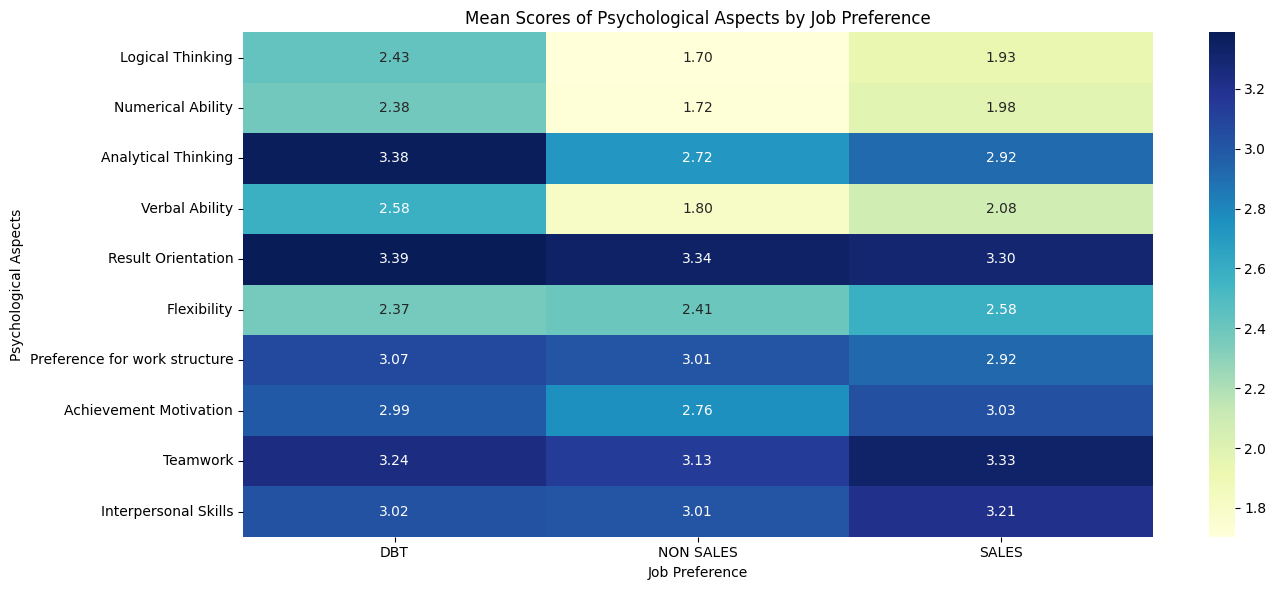

In [59]:
# mean for each job preference
mean_by_job = df_by_job.mean()

# Plot
plt.figure(figsize=(14, 6))
sns.heatmap(mean_by_job.T, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Mean Scores of Psychological Aspects by Job Preference')
plt.xlabel('Job Preference')
plt.ylabel('Psychological Aspects')
plt.tight_layout()
plt.show()

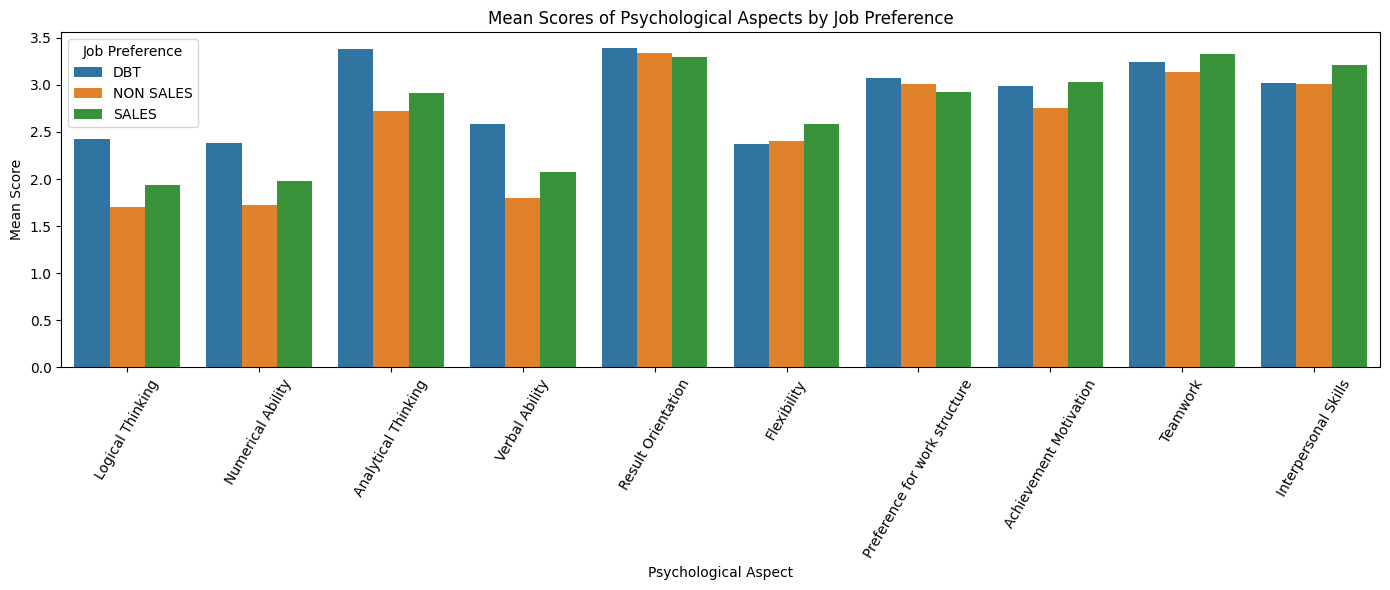

In [60]:
mean_by_job_plot = mean_by_job.reset_index().melt(id_vars='Job Preference', var_name='Psychological Aspect', value_name='Mean Score')

# Create a bar plot
plt.figure(figsize=(14, 6))
sns.barplot(data=mean_by_job_plot, x='Psychological Aspect', y='Mean Score', hue='Job Preference')
plt.title('Mean Scores of Psychological Aspects by Job Preference')
plt.xticks(rotation=60)
plt.xlabel('Psychological Aspect')
plt.ylabel('Mean Score')
plt.legend(title='Job Preference')
plt.tight_layout()
plt.show()

### Visualization of Distribution Proportion

In [61]:
for col in aspect_cols:
    print(f"Distribution of Proportion: {col}")
    print(df.groupby('Job Preference')[col].value_counts(normalize=True).unstack().fillna(0))
    print("\n" + "-"*50 + "\n")

Distribution of Proportion: Logical Thinking
Logical Thinking         1         2         3         4         5
Job Preference                                                    
DBT               0.155248  0.359828  0.387405  0.097137  0.000382
NON SALES         0.452474  0.401414  0.135899  0.010212  0.000000
SALES             0.375788  0.360139  0.218648  0.044990  0.000435

--------------------------------------------------

Distribution of Proportion: Numerical Ability
Numerical Ability         1         2         3         4         5
Job Preference                                                     
DBT                0.156679  0.430821  0.301813  0.097233  0.013454
NON SALES          0.441477  0.411626  0.129615  0.016496  0.000786
SALES              0.340143  0.389263  0.224951  0.041947  0.003695

--------------------------------------------------

Distribution of Proportion: Analytical Thinking
Analytical Thinking         1         2         3         4         5  \
Job Pre

Distribution of Proportion: Logical Thinking


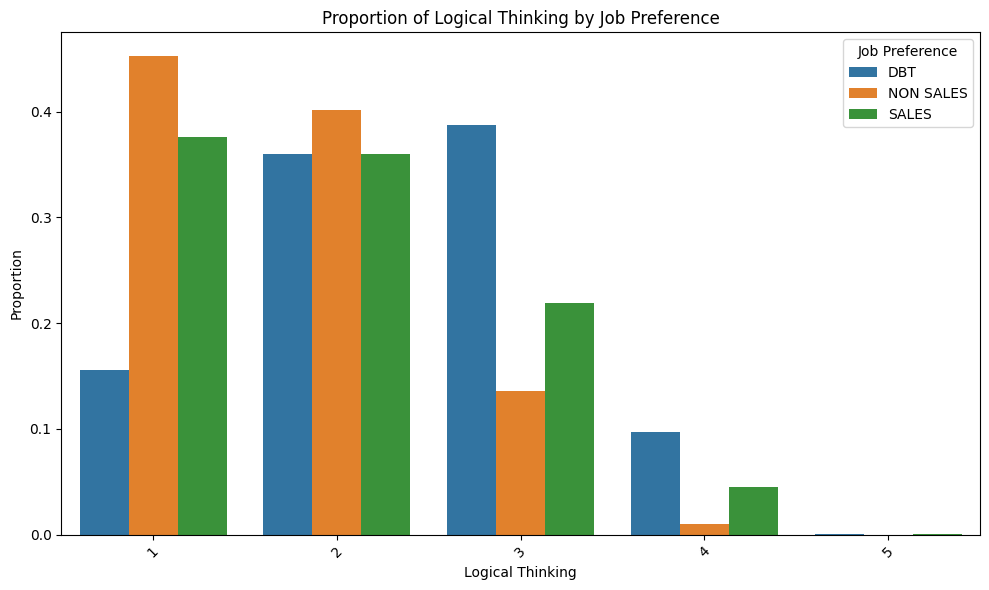


--------------------------------------------------

Distribution of Proportion: Numerical Ability


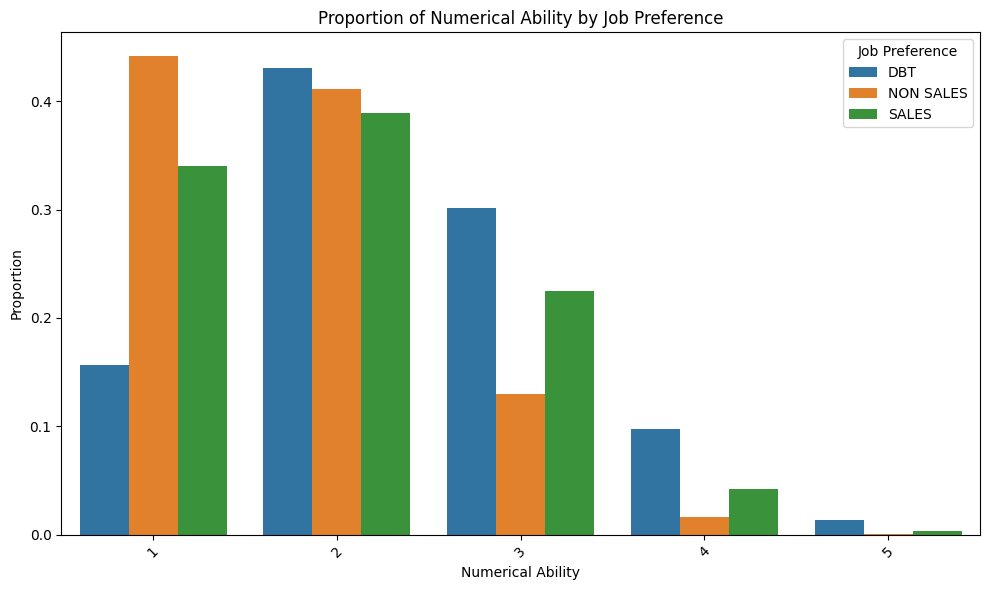


--------------------------------------------------

Distribution of Proportion: Analytical Thinking


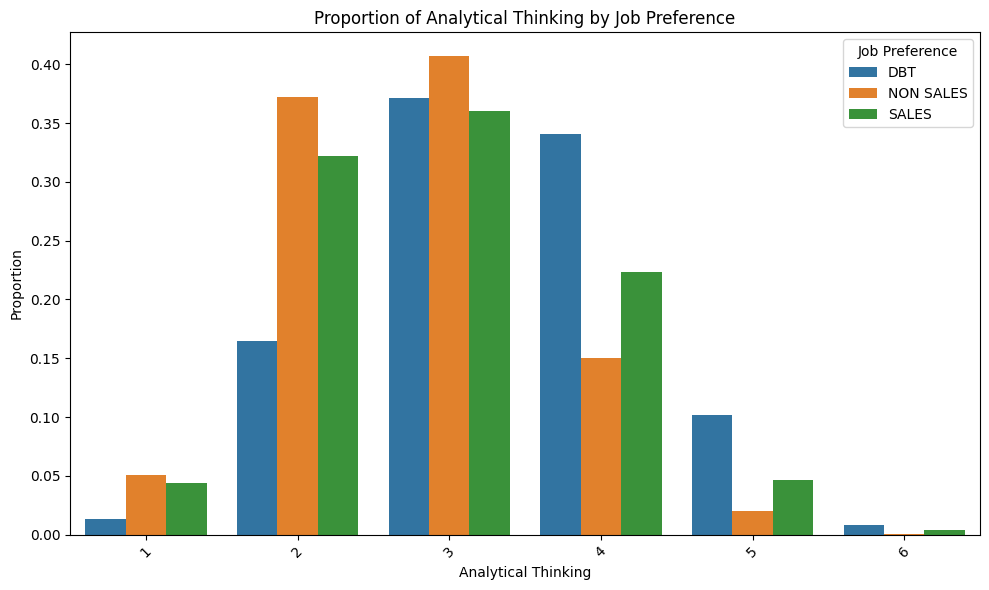


--------------------------------------------------

Distribution of Proportion: Verbal Ability


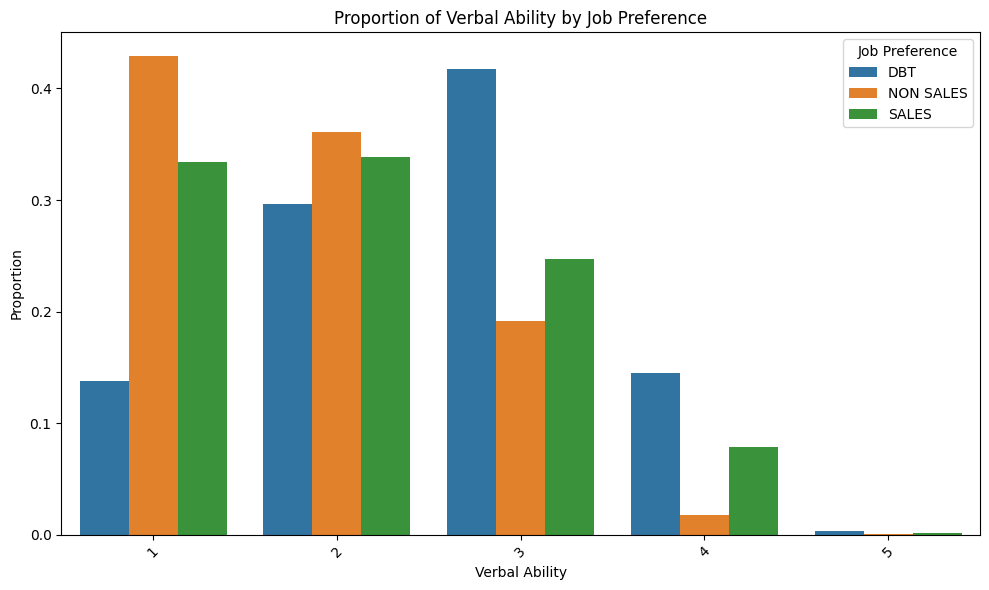


--------------------------------------------------

Distribution of Proportion: Result Orientation


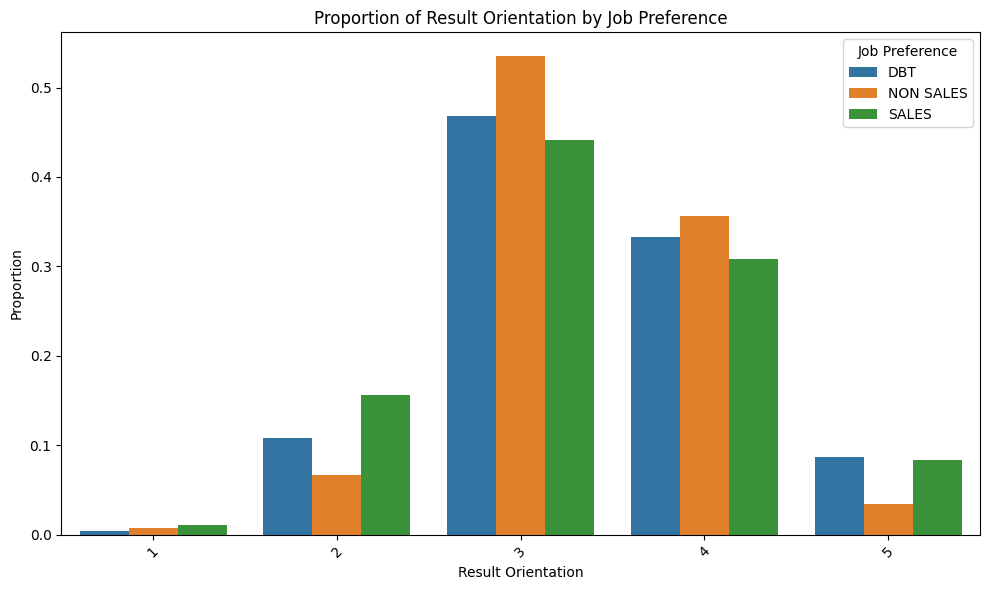


--------------------------------------------------

Distribution of Proportion: Flexibility


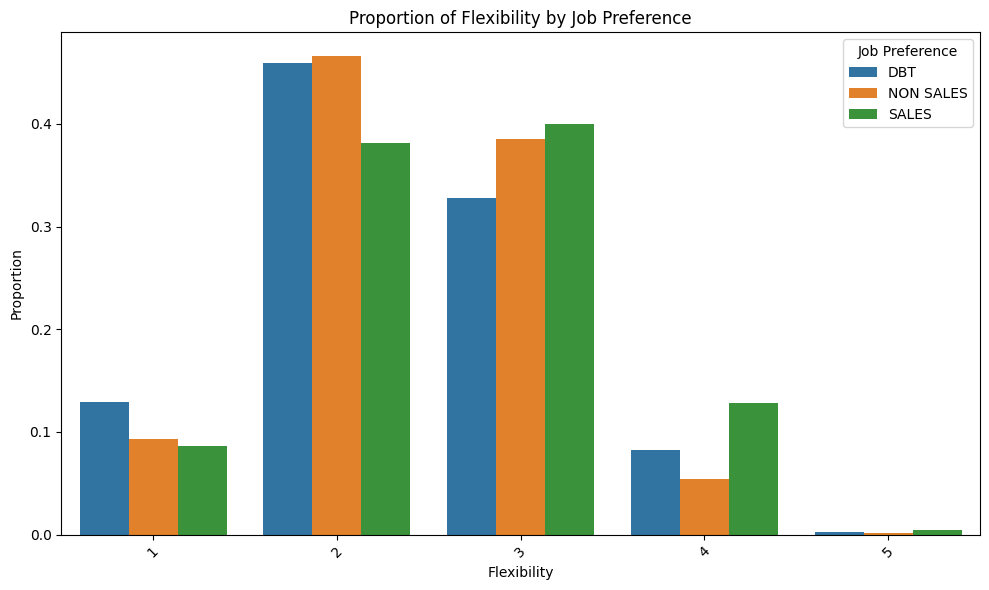


--------------------------------------------------

Distribution of Proportion: Preference for work structure


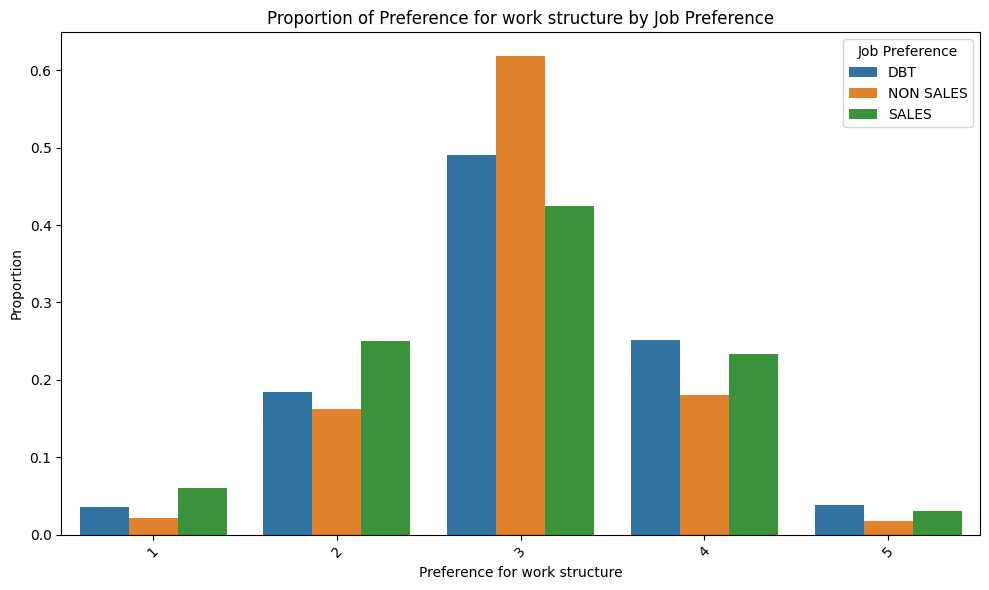


--------------------------------------------------

Distribution of Proportion: Achievement Motivation


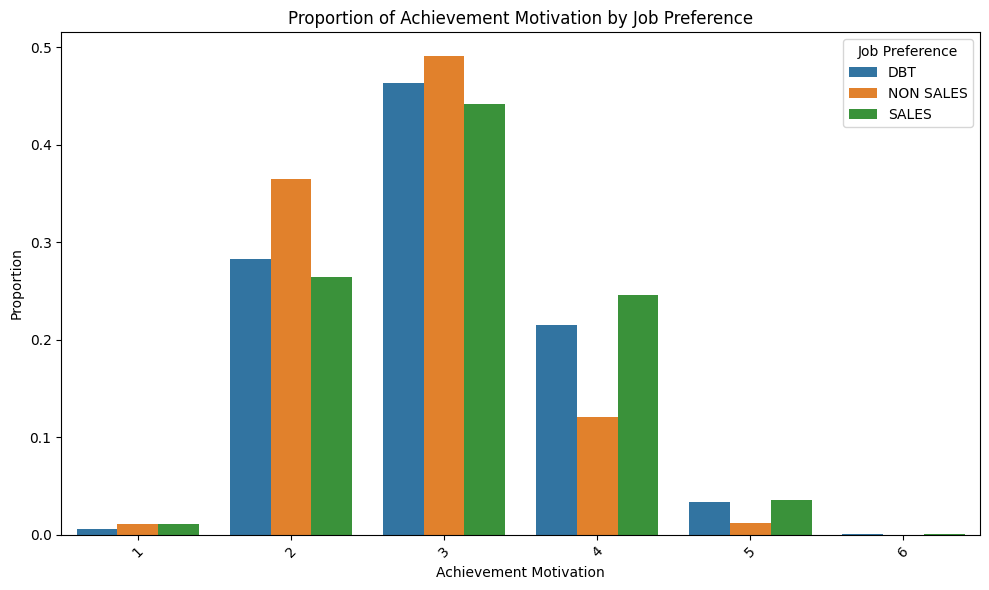


--------------------------------------------------

Distribution of Proportion: Teamwork


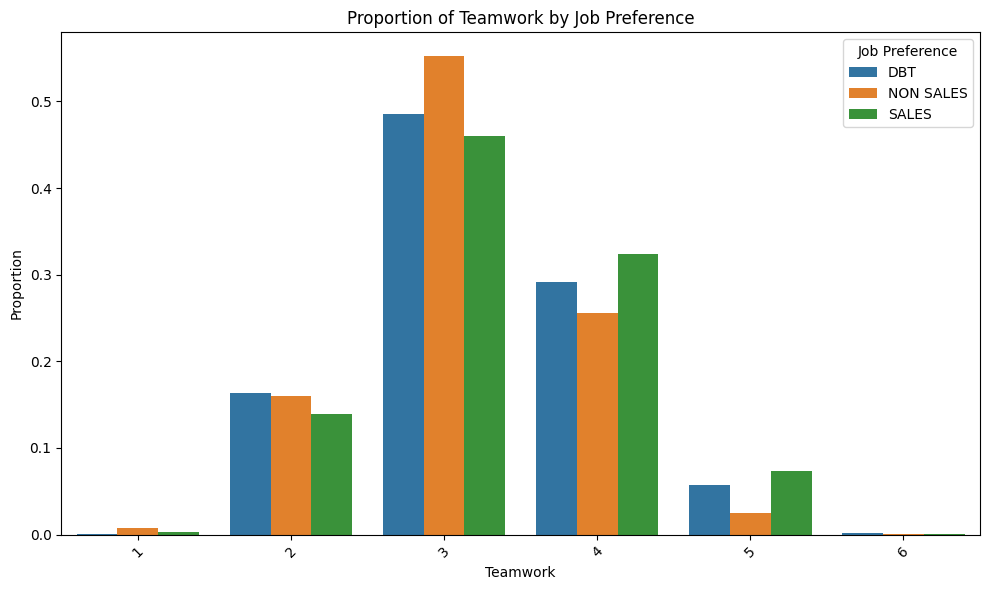


--------------------------------------------------

Distribution of Proportion: Interpersonal Skills


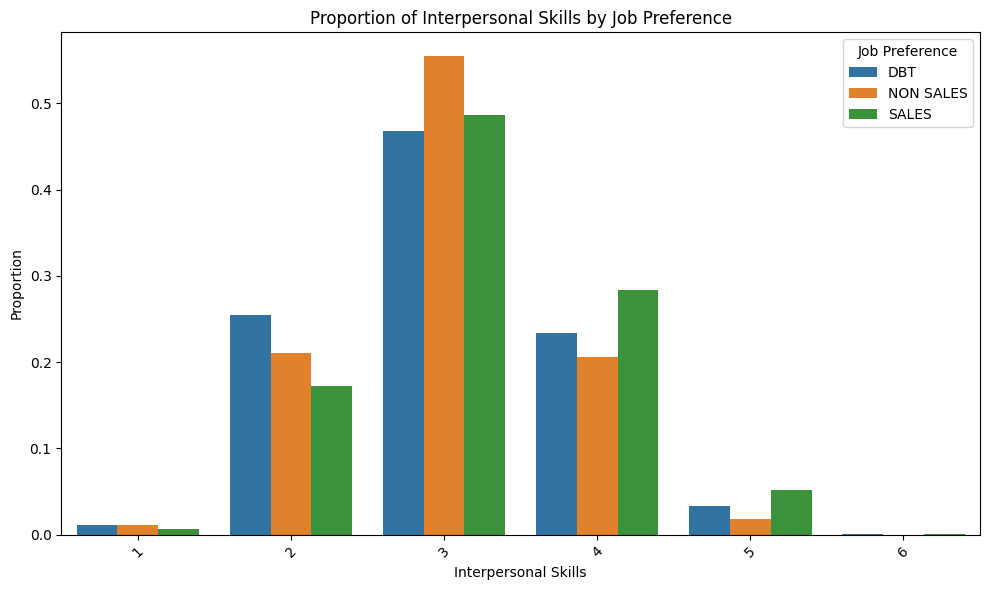


--------------------------------------------------



In [62]:
for col in aspect_cols:
    print(f"Distribution of Proportion: {col}")
    
    # calculate proportions for each score in the psychological column, grouped by job preference
    prop_df = df.groupby('Job Preference')[col].value_counts(normalize=True).unstack().fillna(0)

    # Change the index to a column for easier plotting
    prop_df = prop_df.reset_index().melt(id_vars='Job Preference', var_name=col, value_name='proportion')

    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(data=prop_df, x=col, y='proportion', hue='Job Preference')
    plt.title(f'Proportion of {col} by Job Preference')
    plt.ylabel('Proportion')
    plt.xlabel(col)
    plt.legend(title='Job Preference')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    print("\n" + "-"*50 + "\n")


## Normality Test

In [63]:
from scipy.stats import shapiro

# create dictionary to store results
normality_results = {}

# loop for each aspect and each job preference
for aspect in aspect_cols:
    for job in df['Job Preference'].unique():
        subset = df[df['Job Preference'] == job][aspect].dropna()
        if len(subset) >= 3:  # Shapiro needs at least 3 data points
            stat, p_value = shapiro(subset)
            normality_results[(aspect, job)] = p_value
        else:
            normality_results[(aspect, job)] = None  # for cases with insufficient data

# convert results to DataFrame
normality_df = pd.DataFrame.from_dict(normality_results, orient='index', columns=['p_value'])
normality_df.index = pd.MultiIndex.from_tuples(normality_df.index, names=['Aspect', 'Job Preference'])

# add colom for significance level
def interpret_p(p):
    if p is None:
        return 'Insufficient data'
    elif p < 0.05:
        return 'Not Normal (significant)'
    else:
        return 'Normal (not significant)'

normality_df['Interpretation'] = normality_df['p_value'].apply(interpret_p)

# show results
print(normality_df.round(4))

                                              p_value  \
Aspect                        Job Preference            
Logical Thinking              SALES               0.0   
                              NON SALES           0.0   
                              DBT                 0.0   
Numerical Ability             SALES               0.0   
                              NON SALES           0.0   
                              DBT                 0.0   
Analytical Thinking           SALES               0.0   
                              NON SALES           0.0   
                              DBT                 0.0   
Verbal Ability                SALES               0.0   
                              NON SALES           0.0   
                              DBT                 0.0   
Result Orientation            SALES               0.0   
                              NON SALES           0.0   
                              DBT                 0.0   
Flexibility                   S

c:\Users\M. DUDIH FADILAH H\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10480.
  res = hypotest_fun_out(*samples, **kwds)


because data is not normal, so this is data is not parametrik, So I choose kruskall walls as a method for non-parametrik

## Test of difference between groups

### Kruskall Test

In [64]:
kruskal_results = {}

# loop for each aspect
for aspect in aspect_cols:
    # get data for each job preference
    groups = [df[df['Job Preference'] == job][aspect].dropna() for job in df['Job Preference'].unique()]
    
    # perform Kruskal-Wallis test
    stat, p_value = kruskal(*groups)
    
    # store results
    kruskal_results[aspect] = {'statistic': stat, 'p_value': p_value}

# convert results to DataFrame
kruskal_df = pd.DataFrame.from_dict(kruskal_results, orient='index')
kruskal_df['Interpretation'] = kruskal_df['p_value'].apply(lambda p: 'Significant' if p < 0.05 else 'Not Significant')
# show results
print(kruskal_df.round(4))

                               statistic  p_value Interpretation
Logical Thinking               1467.9333      0.0    Significant
Numerical Ability              1031.4644      0.0    Significant
Analytical Thinking            1053.2130      0.0    Significant
Verbal Ability                 1417.4708      0.0    Significant
Result Orientation               35.0080      0.0    Significant
Flexibility                     216.8272      0.0    Significant
Preference for work structure    87.3025      0.0    Significant
Achievement Motivation          116.0694      0.0    Significant
Teamwork                         66.7615      0.0    Significant
Interpersonal Skills            165.9250      0.0    Significant


All categories were found to differ significantly in terms of psychological aspects. Then, next method is test Dunn to see what the different for pair group

### Test Dunn Post Hoc

In [65]:
import scikit_posthocs as sp

In [66]:
for aspek in aspect_cols:
    print(f"\nTest Dunn for {aspek}")
    posthoc = sp.posthoc_dunn(df, val_col=aspek, group_col='Job Preference', p_adjust='bonferroni')
    
    styled_posthoc = posthoc.style.map(
        lambda val: 'color: red' if val < 0.05 else ''
    ).format("{:.5f}")

    display(styled_posthoc)


Test Dunn for Logical Thinking


,DBT,NON SALES,SALES
DBT,1.00000,0.00000,0.00000
NON SALES,0.00000,1.00000,0.00000
SALES,0.00000,0.00000,1.00000



Test Dunn for Numerical Ability


,DBT,NON SALES,SALES
DBT,1.00000,0.00000,0.00000
NON SALES,0.00000,1.00000,0.00000
SALES,0.00000,0.00000,1.00000



Test Dunn for Analytical Thinking


,DBT,NON SALES,SALES
DBT,1.00000,0.00000,0.00000
NON SALES,0.00000,1.00000,0.00000
SALES,0.00000,0.00000,1.00000



Test Dunn for Verbal Ability


,DBT,NON SALES,SALES
DBT,1.00000,0.00000,0.00000
NON SALES,0.00000,1.00000,0.00000
SALES,0.00000,0.00000,1.00000



Test Dunn for Result Orientation


,DBT,NON SALES,SALES
DBT,1.00000,0.48057,0.00000
NON SALES,0.48057,1.00000,0.14225
SALES,0.00000,0.14225,1.00000



Test Dunn for Flexibility


,DBT,NON SALES,SALES
DBT,1.00000,0.16722,0.00000
NON SALES,0.16722,1.00000,0.00000
SALES,0.00000,0.00000,1.00000



Test Dunn for Preference for work structure


,DBT,NON SALES,SALES
DBT,1.00000,0.01721,0.00000
NON SALES,0.01721,1.00000,0.02855
SALES,0.00000,0.02855,1.00000



Test Dunn for Achievement Motivation


,DBT,NON SALES,SALES
DBT,1.00000,0.00000,0.00164
NON SALES,0.00000,1.00000,0.00000
SALES,0.00164,0.00000,1.00000



Test Dunn for Teamwork


,DBT,NON SALES,SALES
DBT,1.00000,0.00007,0.00000
NON SALES,0.00007,1.00000,0.00000
SALES,0.00000,0.00000,1.00000



Test Dunn for Interpersonal Skills


,DBT,NON SALES,SALES
DBT,1.00000,1.00000,0.00000
NON SALES,1.00000,1.00000,0.00000
SALES,0.00000,0.00000,1.00000


Visualization of Test Dunn Post-Hoc


Test Dunn Post-Hoc for Logical Thinking


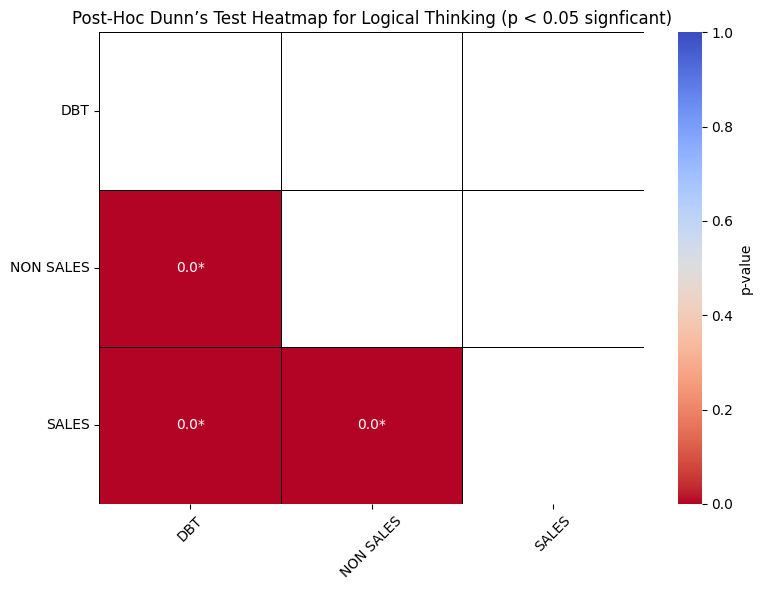


Test Dunn Post-Hoc for Numerical Ability


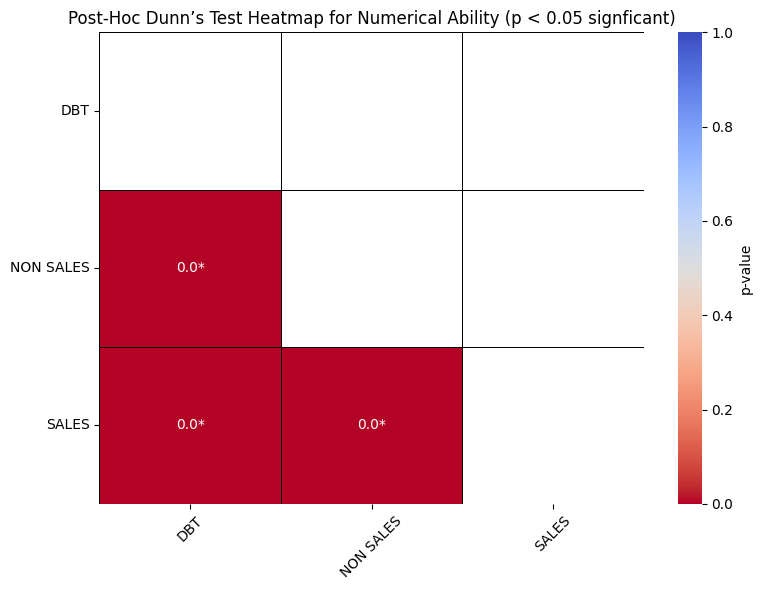


Test Dunn Post-Hoc for Analytical Thinking


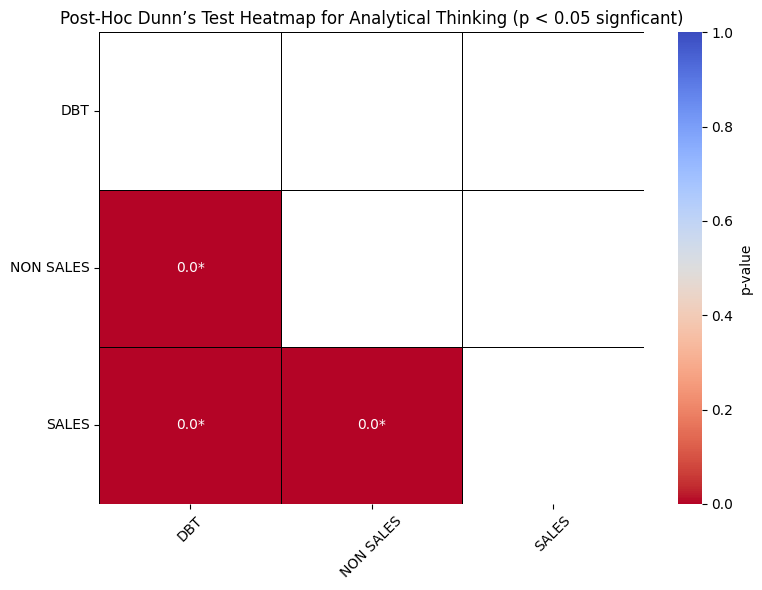


Test Dunn Post-Hoc for Verbal Ability


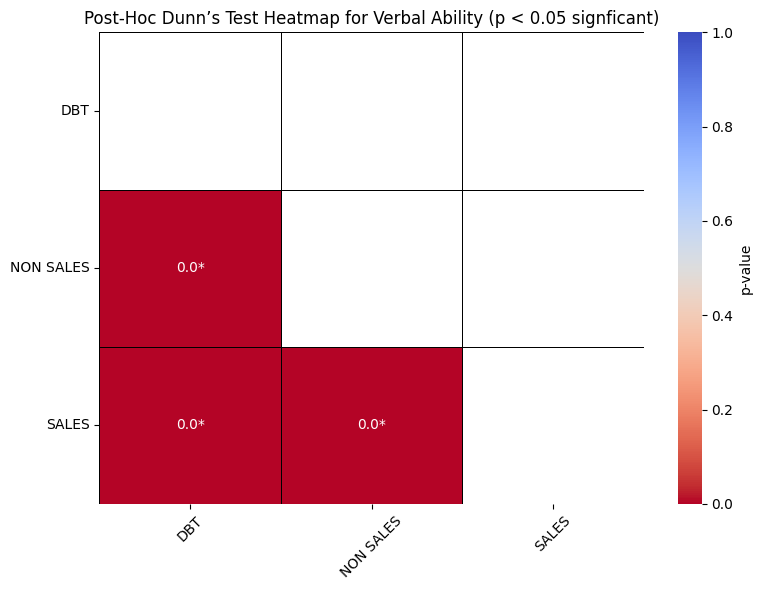


Test Dunn Post-Hoc for Result Orientation


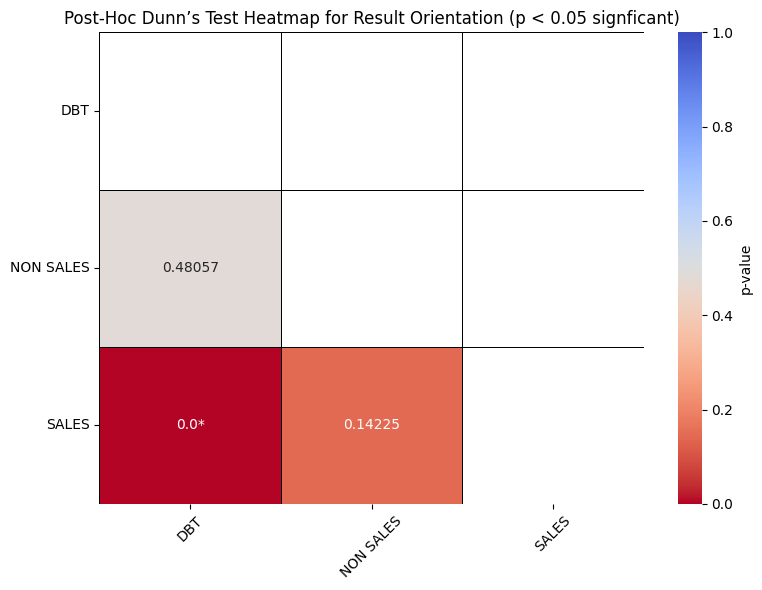


Test Dunn Post-Hoc for Flexibility


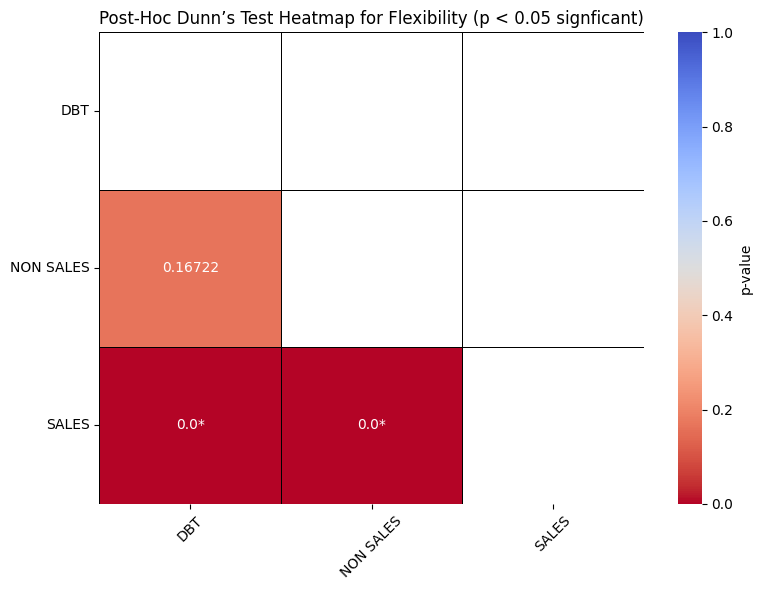


Test Dunn Post-Hoc for Preference for work structure


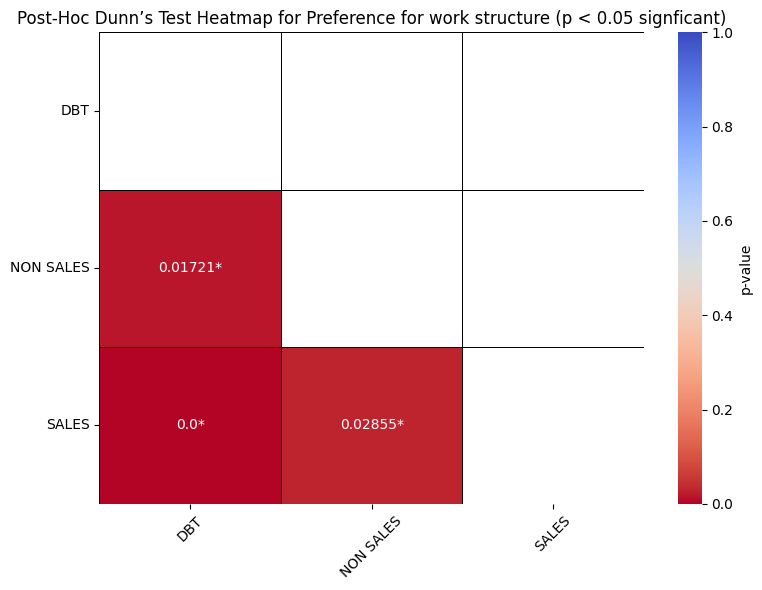


Test Dunn Post-Hoc for Achievement Motivation


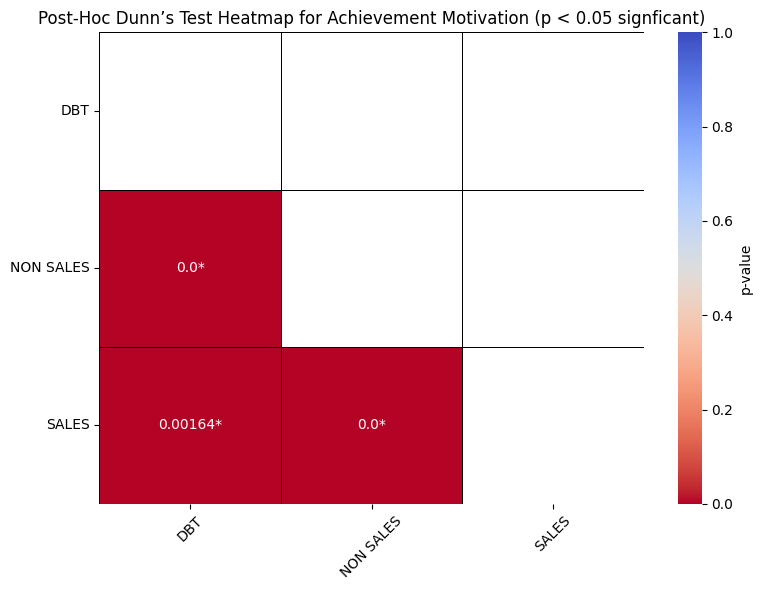


Test Dunn Post-Hoc for Teamwork


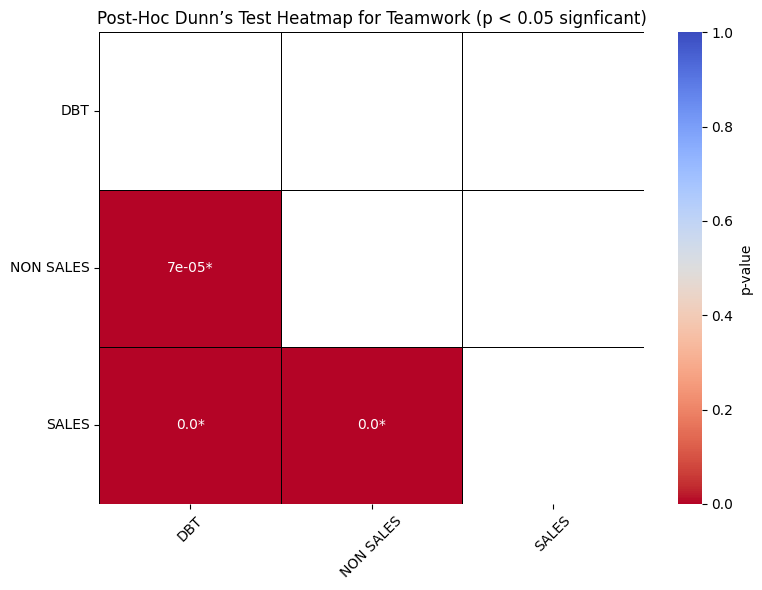


Test Dunn Post-Hoc for Interpersonal Skills


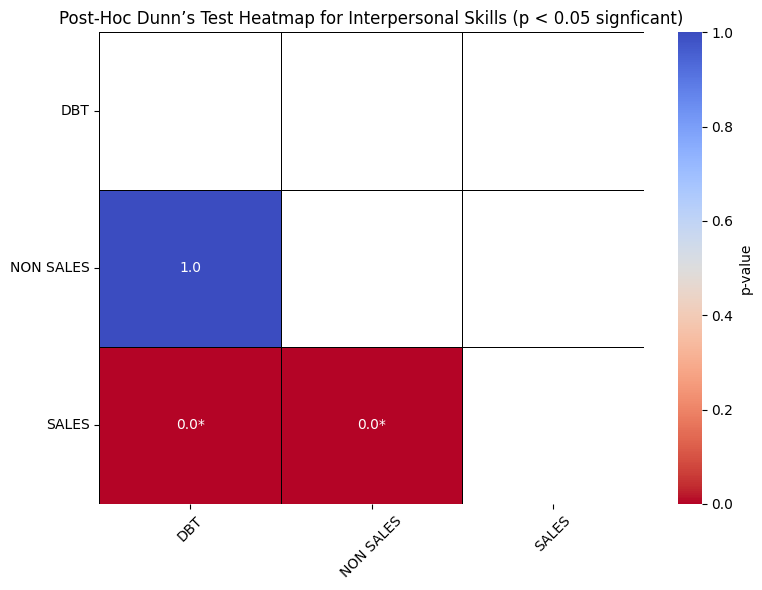

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

for aspek in aspect_cols:
    print(f"\nTest Dunn Post-Hoc for {aspek}")

    # Hitung posthoc
    posthoc = sp.posthoc_dunn(df, val_col=aspek, group_col='Job Preference', p_adjust='bonferroni')

    # Buat anotasi (* untuk signifikan)
    annot = posthoc.round(5).astype(str)
    annot = annot.where(posthoc >= 0.05, annot + "*")

    # Mask segitiga bawah agar tidak redundan
    mask = np.triu(np.ones_like(posthoc, dtype=bool))

    # Plot heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(posthoc, annot=annot, fmt='', cmap='coolwarm_r', 
                linewidths=0.5, linecolor='black', mask=mask,
                cbar_kws={'label': 'p-value'}, vmin=0, vmax=1)

    plt.title(f"Post-Hoc Dunn’s Test Heatmap for {aspek} (p < 0.05 signficant)")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


Based on the results, significant differences were observed across the following psychological aspects:

1. Logical Thinking – All groups show statistically significant differences.
2. Numerical Ability – All groups show statistically significant differences.
3. Analytical Thinking – All groups show statistically significant differences.
4. Verbal Ability – All groups show statistically significant differences.
5. Result Orientation – A statistically significant difference was found between DBT and Sales.
6. Flexibility – Statistically significant differences were found between Sales and DBT, as well as between Sales and Non-Sales.
7. Preference for Work Structure – All groups show statistically significant differences.
8. Achievement Motivation – All groups show statistically significant differences.
9. Teamwork – All groups show statistically significant differences.
10. Interpersonal Skills – The SALES group shows a statistically significant difference in interpersonal skills compared to both the DBT and NON SALES groups. However, no significant difference was observed between the DBT and NON SALES groups.



## Visualization Final After Test Statistics

In [68]:
result_analysis = df.groupby('Job Preference')[aspect_cols].mean().round(2)
result_analysis

,Logical Thinking,Numerical Ability,Analytical Thinking,Verbal Ability,Result Orientation,Flexibility,Preference for work structure,Achievement Motivation,Teamwork,Interpersonal Skills
Job Preference,,,,,,,,,,
DBT,2.43,2.38,3.38,2.58,3.39,2.37,3.07,2.99,3.24,3.02
NON SALES,1.70,1.72,2.72,1.80,3.34,2.41,3.01,2.76,3.13,3.01
SALES,1.93,1.98,2.92,2.08,3.30,2.58,2.92,3.03,3.33,3.21


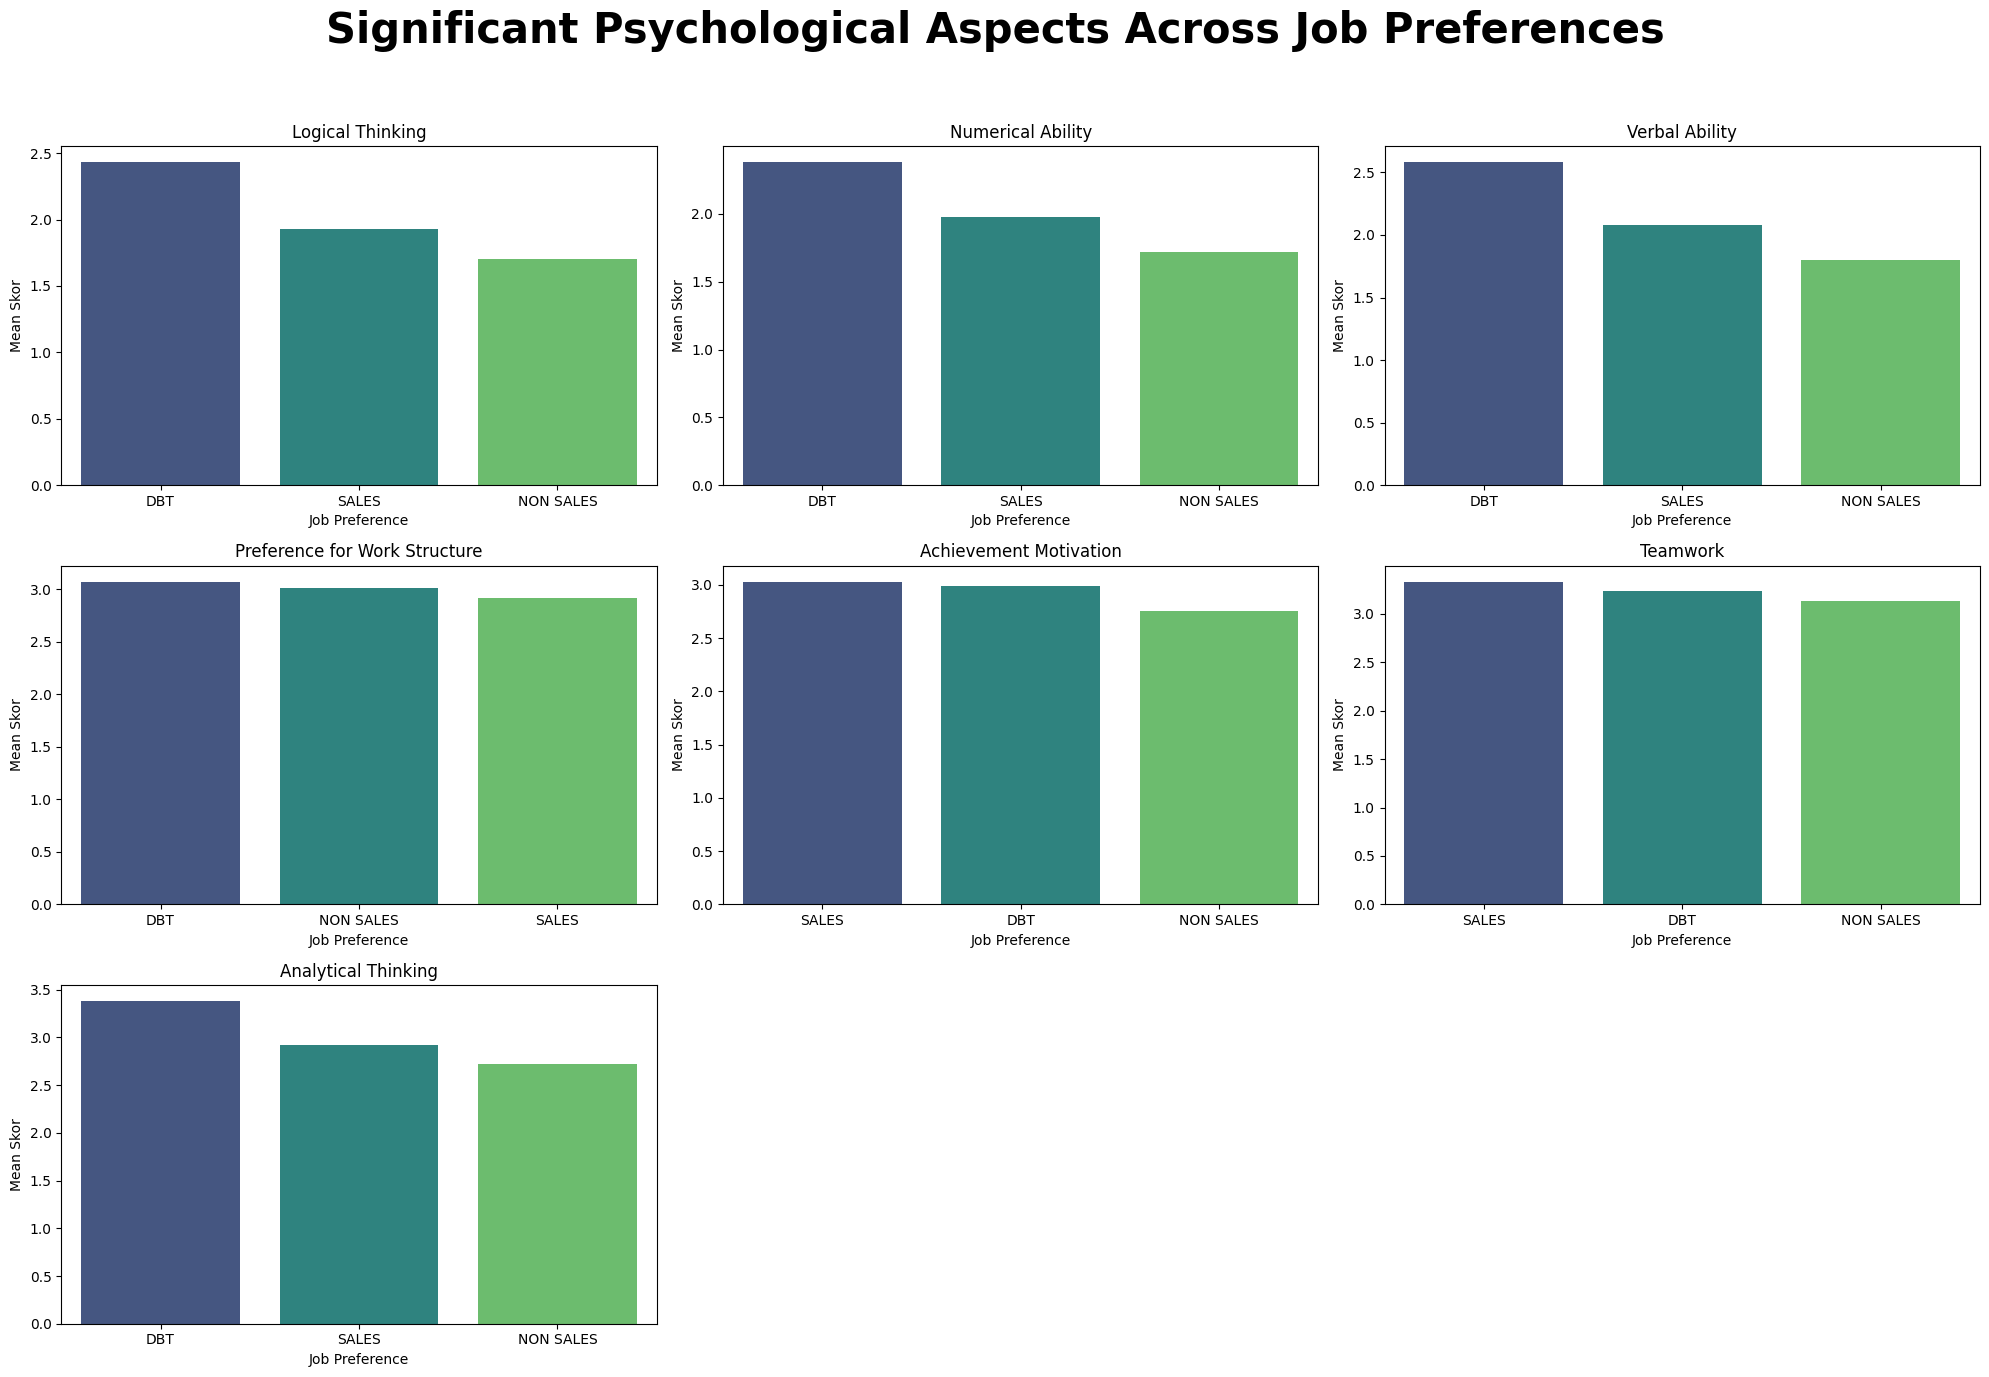

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

#create data
result = df.groupby('Job Preference')[aspect_cols].mean().round(2)

#create plot

fig, axes = plt.subplots(3, 3, figsize=(20, 14))
fig.suptitle('Significant Psychological Aspects Across Job Preferences', fontsize=30, fontweight='bold')
fig.subplots_adjust(hspace=0.6, wspace=1.3)


# PLOT FOR ALL SIGNIFICANT ASPECTS
# plot 1 (Logical Thinking)
sns.barplot(x='Job Preference', y='Logical Thinking', hue = 'Job Preference',data=result.sort_values(by='Logical Thinking', ascending=False), palette='viridis', ax=axes[0, 0])
axes[0, 0].set_title('Logical Thinking')
axes[0, 0].set_xlabel('Job Preference')
axes[0, 0].set_ylabel('Mean Skor')

# plot 2 (Numerical Ability)
sns.barplot(x='Job Preference', y='Numerical Ability', hue = 'Job Preference', data=result.sort_values(by='Numerical Ability', ascending=False), palette='viridis', ax=axes[0, 1])
axes[0, 1].set_title('Numerical Ability')
axes[0, 1].set_xlabel('Job Preference')
axes[0, 1].set_ylabel('Mean Skor')

# plot 3 (Verbal Ability)
sns.barplot(x='Job Preference', y='Verbal Ability', hue = 'Job Preference', data=result.sort_values(by='Verbal Ability', ascending=False), palette='viridis', ax=axes[0, 2])
axes[0, 2].set_title('Verbal Ability')
axes[0, 2].set_xlabel('Job Preference')
axes[0, 2].set_ylabel('Mean Skor')

# plot 4 (Preference for work structure)
sns.barplot(x='Job Preference', y='Preference for work structure', hue = 'Job Preference', data=result.sort_values(by='Preference for work structure', ascending=False), palette='viridis', ax=axes[1, 0])
axes[1, 0].set_title('Preference for Work Structure')
axes[1, 0].set_xlabel('Job Preference')
axes[1, 0].set_ylabel('Mean Skor')

# plot 5 (Achievement Motivation)
sns.barplot(x='Job Preference', y='Achievement Motivation', hue = 'Job Preference', data=result.sort_values(by='Achievement Motivation', ascending=False), palette='viridis', ax=axes[1, 1])
axes[1, 1].set_title('Achievement Motivation')
axes[1, 1].set_xlabel('Job Preference')
axes[1, 1].set_ylabel('Mean Skor')

# plot 6 (Teamwork)
sns.barplot(x='Job Preference', y='Teamwork', hue = 'Job Preference', data=result.sort_values(by='Teamwork', ascending=False), palette='viridis', ax=axes[1, 2])
axes[1, 2].set_title('Teamwork')
axes[1, 2].set_xlabel('Job Preference')
axes[1, 2].set_ylabel('Mean Skor')

# plot 7 (Analytical Thiking)
sns.barplot(x='Job Preference', y='Analytical Thinking', hue = 'Job Preference', data=result.sort_values(by='Analytical Thinking', ascending=False), palette='viridis', ax=axes[2, 0])
axes[2, 0].set_title('Analytical Thinking')
axes[2, 0].set_xlabel('Job Preference')
axes[2, 0].set_ylabel('Mean Skor')

# remove empty plots
axes[2, 1].axis('off')
axes[2, 2].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [70]:
import matplotlib.patches as mpatches

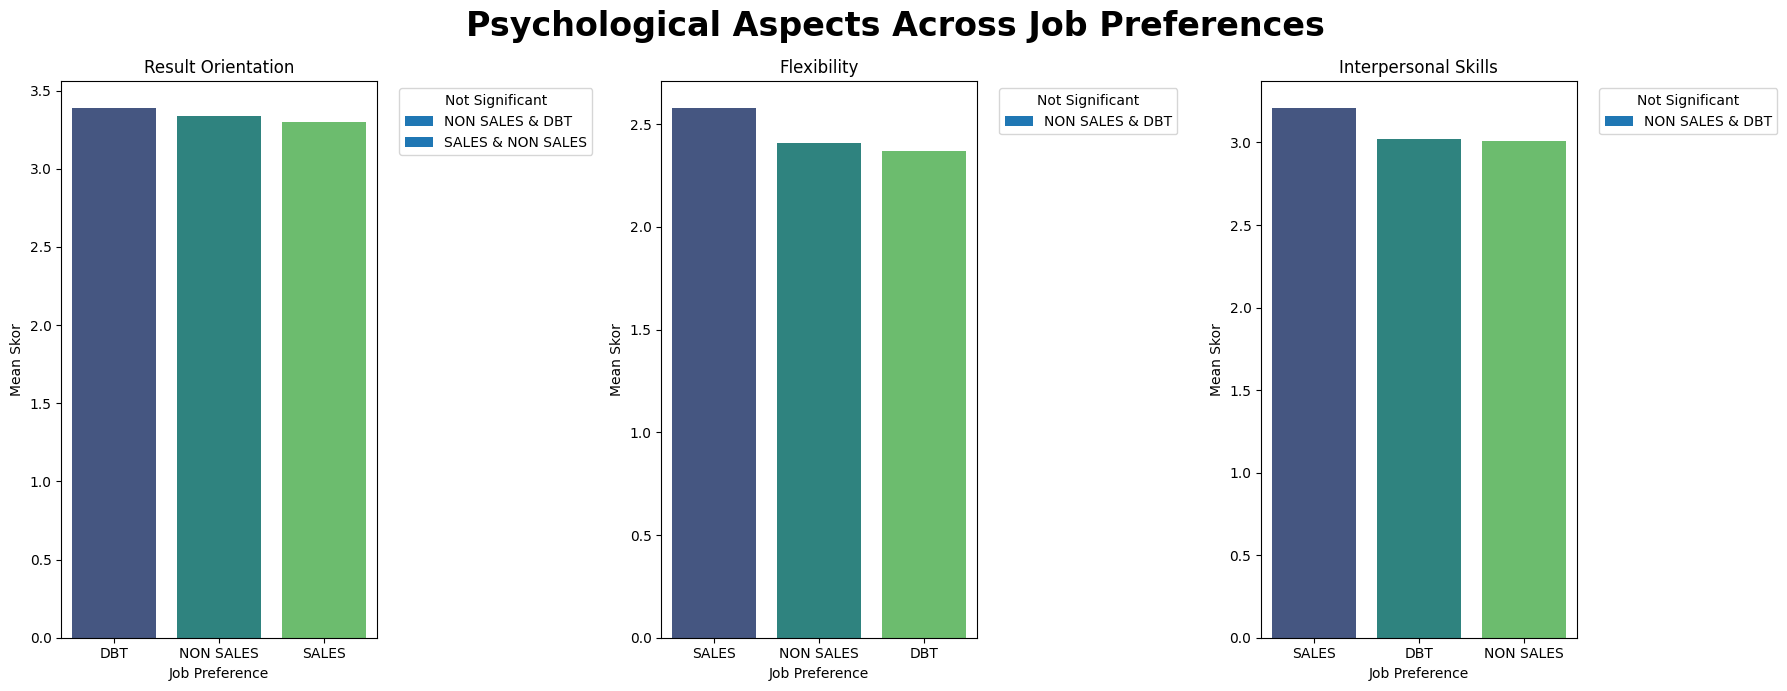

In [71]:
# create data
result = df.groupby('Job Preference')[aspect_cols].mean().round(2).reset_index()

#create plot
fig, axes = plt.subplots(1, 3, figsize=(18, 7))
fig.suptitle('Psychological Aspects Across Job Preferences', fontsize=24, fontweight='bold', x=0.5,ha='center')
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Plot 1 (Result Orientation)
sns.barplot(
    x='Job Preference', y='Result Orientation',
    hue='Job Preference', data=result.sort_values(by='Result Orientation', ascending=False),
    palette='viridis', ax=axes[0], legend=False
)
axes[0].set_title('Result Orientation')
axes[0].set_xlabel('Job Preference')
axes[0].set_ylabel('Mean Skor')
axes[0].legend(
    handles=[mpatches.Patch(label='NON SALES & DBT'), mpatches.Patch(label='SALES & NON SALES')],
    title='Not Significant', bbox_to_anchor=(1.05, 1), loc='upper left'
)

# Plot 2 (Flexibility)
sns.barplot(
    x='Job Preference', y='Flexibility',
    hue='Job Preference', data=result.sort_values(by='Flexibility', ascending=False),
    palette='viridis', ax=axes[1], legend=False
)
axes[1].set_title('Flexibility')
axes[1].set_xlabel('Job Preference')
axes[1].set_ylabel('Mean Skor')
axes[1].legend(
    handles=[mpatches.Patch(label='NON SALES & DBT')],
    title='Not Significant', bbox_to_anchor=(1.05, 1), loc='upper left'
)

# Plot 3 (Interpersonal Skills)
sns.barplot(
    x='Job Preference', y='Interpersonal Skills',
    hue='Job Preference', data=result.sort_values(by='Interpersonal Skills', ascending=False),
    palette='viridis', ax=axes[2], legend=False
)
axes[2].set_title('Interpersonal Skills')
axes[2].set_xlabel('Job Preference')
axes[2].set_ylabel('Mean Skor')
axes[2].legend(
    handles=[mpatches.Patch(label='NON SALES & DBT')],
    title='Not Significant', bbox_to_anchor=(1.05, 1), loc='upper left'
)

fig.tight_layout()
plt.show()


# ANALYSIS OF PSYCHOLOGICAL ASPECTS BASED ON REGION

## Check Data

In [72]:
df.isnull().sum()

Participant Code                    0
Region                           3088
Logical Thinking                    0
Numerical Ability                   0
Analytical Thinking                 0
Verbal Ability                      0
Result Orientation                  0
Flexibility                         0
Preference for work structure       0
Achievement Motivation              0
Teamwork                            0
Interpersonal Skills                0
Job Preference                      0
Match Percentage                    0
Recommendation Result               0
dtype: int64

In [73]:
df

,Participant Code,Region,Logical Thinking,Numerical Ability,Analytical Thinking,Verbal Ability,Result Orientation,Flexibility,Preference for work structure,Achievement Motivation,Teamwork,Interpersonal Skills,Job Preference,Match Percentage,Recommendation Result
0,DCX_001,BALI NUSRA,2,2,3,3,3,3,3,2,3,4,SALES,91.67,Recommended
1,DCX_002,BALI NUSRA,3,3,3,3,4,4,4,4,5,5,SALES,94.17,Recommended
2,DCX_003,BALI NUSRA,3,3,4,3,5,3,4,4,5,4,SALES,94.17,Recommended
3,DCX_004,BALI NUSRA,3,3,3,3,5,4,4,5,5,3,SALES,91.67,Recommended
4,DCX_005,BALI NUSRA,3,2,3,3,3,3,3,2,4,3,SALES,91.67,Recommended
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16349,DCX_16350,NaN,1,1,2,1,3,2,4,2,3,3,SALES,67.50,Not Recommended
16350,DCX_16351,NaN,1,1,2,1,3,3,2,2,4,3,SALES,70.00,Not Recommended
16351,DCX_16352,NaN,1,1,3,1,2,3,1,2,4,4,SALES,70.00,Not Recommended
16352,DCX_16353,NaN,1,2,3,1,3,2,4,1,3,2,SALES,70.00,Not Recommended


In [74]:
df_region = df[aspect_cols + ['Region']]
df_region

,Logical Thinking,Numerical Ability,Analytical Thinking,Verbal Ability,Result Orientation,Flexibility,Preference for work structure,Achievement Motivation,Teamwork,Interpersonal Skills,Region
0,2,2,3,3,3,3,3,2,3,4,BALI NUSRA
1,3,3,3,3,4,4,4,4,5,5,BALI NUSRA
2,3,3,4,3,5,3,4,4,5,4,BALI NUSRA
3,3,3,3,3,5,4,4,5,5,3,BALI NUSRA
4,3,2,3,3,3,3,3,2,4,3,BALI NUSRA
...,...,...,...,...,...,...,...,...,...,...,...
16349,1,1,2,1,3,2,4,2,3,3,NaN
16350,1,1,2,1,3,3,2,2,4,3,NaN
16351,1,1,3,1,2,3,1,2,4,4,NaN
16352,1,2,3,1,3,2,4,1,3,2,NaN


In [75]:
df['Region'].value_counts()

Region
-              8357
JAKARTA        1308
HEAD OFFICE     832
SUMATERA 1      518
SULAWESI        504
JAWA BARAT      441
JAWA TIMUR      400
KALIMANTAN      244
JAWA TENGAH     242
SUMATERA 2      223
BALI NUSRA      197
Name: count, dtype: int64

In [76]:
df['Region'].isna().sum()

np.int64(3088)

Since there are columns containing 'nan' and '-', those rows were dropped.

In [77]:
df_region = df_region[(df_region['Region'] != '-') & (df_region['Region'].notna())]
df_region

,Logical Thinking,Numerical Ability,Analytical Thinking,Verbal Ability,Result Orientation,Flexibility,Preference for work structure,Achievement Motivation,Teamwork,Interpersonal Skills,Region
0,2,2,3,3,3,3,3,2,3,4,BALI NUSRA
1,3,3,3,3,4,4,4,4,5,5,BALI NUSRA
2,3,3,4,3,5,3,4,4,5,4,BALI NUSRA
3,3,3,3,3,5,4,4,5,5,3,BALI NUSRA
4,3,2,3,3,3,3,3,2,4,3,BALI NUSRA
...,...,...,...,...,...,...,...,...,...,...,...
4904,3,2,4,3,2,2,2,2,3,2,SULAWESI
4905,1,1,3,1,3,3,3,2,4,3,SULAWESI
4906,1,1,2,2,3,3,3,2,4,3,SULAWESI
4907,1,2,4,1,4,1,4,3,2,2,SULAWESI


In [78]:
df_by_region = df_region.groupby('Region')[aspect_cols]

## Exploratory Data Analysis (EDA)

### Descriptive Statistics

In [79]:
df_by_region.describe()

Logical Thinking                                               \
                       count      mean       std  min  25%  50%  75%  max   
Region                                                                      
BALI NUSRA             197.0  1.736041  0.736352  1.0  1.0  2.0  2.0  4.0   
HEAD OFFICE            832.0  1.790865  0.730635  1.0  1.0  2.0  2.0  4.0   
JAKARTA               1308.0  2.210245  0.876097  1.0  2.0  2.0  3.0  5.0   
JAWA BARAT             441.0  2.335601  0.899913  1.0  2.0  2.0  3.0  5.0   
JAWA TENGAH            242.0  2.136364  0.784973  1.0  2.0  2.0  3.0  4.0   
JAWA TIMUR             400.0  2.420000  0.784307  1.0  2.0  2.0  3.0  4.0   
KALIMANTAN             244.0  2.028689  0.808390  1.0  1.0  2.0  3.0  4.0   
SULAWESI               504.0  1.853175  0.789009  1.0  1.0  2.0  2.0  4.0   
SUMATERA 1             518.0  1.845560  0.719506  1.0  1.0  2.0  2.0  4.0   
SUMATERA 2             223.0  1.982063  0.793919  1.0  1.0  2.0  2.0  4.0   

            Numerical Ability            ... Teamwork       \
                        count      mean  ...      75%  max   
Region                                   ...                 
BALI NUSRA              197.0  1.791878  ...      4.0  5.0   
HEAD OFFICE             832.0  1.819712  ...      4.0  6.0   
JAKARTA                1308.0  2.243119  ...      4.0  6.0   
JAWA BARAT              441.0  2.353741  ...      4.0  6.0   
JAWA TENGAH             242.0  2.227273  ...      4.0  5.0   
JAWA TIMUR              400.0  2.380000  ...      4.0  5.0   
KALIMANTAN              244.0  2.102459  ...      4.0  5.0   
SULAWESI                504.0  1.849206  ...      4.0  5.0   
SUMATERA 1              518.0  1.888031  ...      4.0  5.0   
SUMATERA 2              223.0  1.968610  ...      4.0  5.0   

            Interpersonal Skills                                               
                           count      mean       std  min  25%  50%  75%  max  
Region                                                                         
BALI NUSRA                 197.0  3.050761  0.698001  2.0  3.0  3.0  3.0  5.0  
HEAD OFFICE                832.0  2.954327  0.680009  1.0  3.0  3.0  3.0  6.0  
JAKARTA                   1308.0  3.458716  0.779800  1.0  3.0  3.0  4.0  6.0  
JAWA BARAT                 441.0  3.575964  0.765306  2.0  3.0  4.0  4.0  5.0  
JAWA TENGAH                242.0  3.276860  0.815947  1.0  3.0  3.0  4.0  6.0  
JAWA TIMUR                 400.0  3.555000  0.776842  2.0  3.0  4.0  4.0  6.0  
KALIMANTAN                 244.0  3.442623  0.743135  2.0  3.0  3.0  4.0  5.0  
SULAWESI                   504.0  3.182540  0.768679  1.0  3.0  3.0  4.0  5.0  
SUMATERA 1                 518.0  2.988417  0.689701  1.0  3.0  3.0  3.0  5.0  
SUMATERA 2                 223.0  2.964126  0.709374  1.0  3.0  3.0  3.0  5.0  

[10 rows x 80 columns]

In [80]:
df_by_region.mean()

,Logical Thinking,Numerical Ability,Analytical Thinking,Verbal Ability,Result Orientation,Flexibility,Preference for work structure,Achievement Motivation,Teamwork,Interpersonal Skills
Region,,,,,,,,,,
BALI NUSRA,1.736041,1.791878,2.786802,1.928934,3.401015,2.502538,3.020305,2.857868,3.279188,3.050761
HEAD OFFICE,1.790865,1.819712,2.795673,1.944712,3.102163,2.375000,2.760817,2.805288,3.082933,2.954327
JAKARTA,2.210245,2.243119,3.182722,2.346330,3.583333,2.805046,3.191896,3.219419,3.553517,3.458716
JAWA BARAT,2.335601,2.353741,3.426304,2.408163,3.630385,2.859410,3.269841,3.272109,3.650794,3.575964
JAWA TENGAH,2.136364,2.227273,3.169421,2.334711,3.384298,2.669421,2.867769,3.074380,3.380165,3.276860
JAWA TIMUR,2.420000,2.380000,3.407500,2.610000,3.595000,2.910000,3.220000,3.337500,3.615000,3.555000
KALIMANTAN,2.028689,2.102459,3.040984,2.217213,3.594262,2.815574,3.143443,3.135246,3.565574,3.442623
SULAWESI,1.853175,1.849206,2.871032,1.970238,3.515873,2.638889,3.130952,3.023810,3.349206,3.182540
SUMATERA 1,1.845560,1.888031,2.791506,1.965251,3.158301,2.380309,2.743243,2.808880,3.137066,2.988417


#### Visualization Of Mean

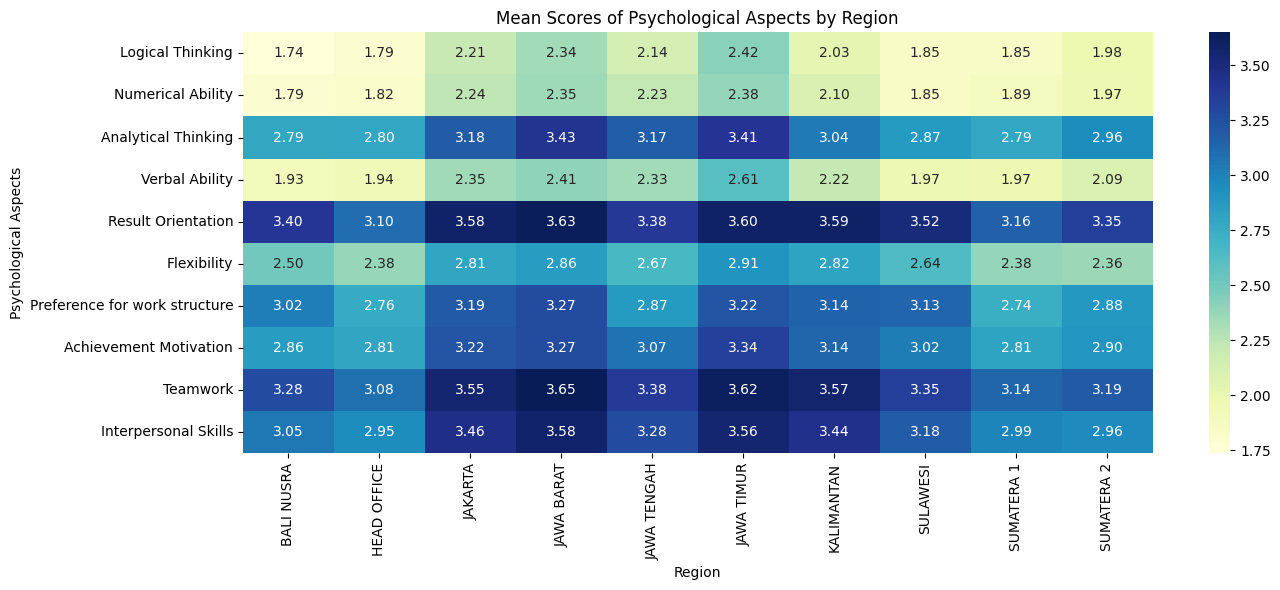

In [81]:
# mean for each region
mean_by_region = df_by_region.mean()

# Plot
plt.figure(figsize=(14, 6))
sns.heatmap(mean_by_region.T, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Mean Scores of Psychological Aspects by Region')
plt.xlabel('Region')
plt.ylabel('Psychological Aspects')
plt.tight_layout()
plt.show()

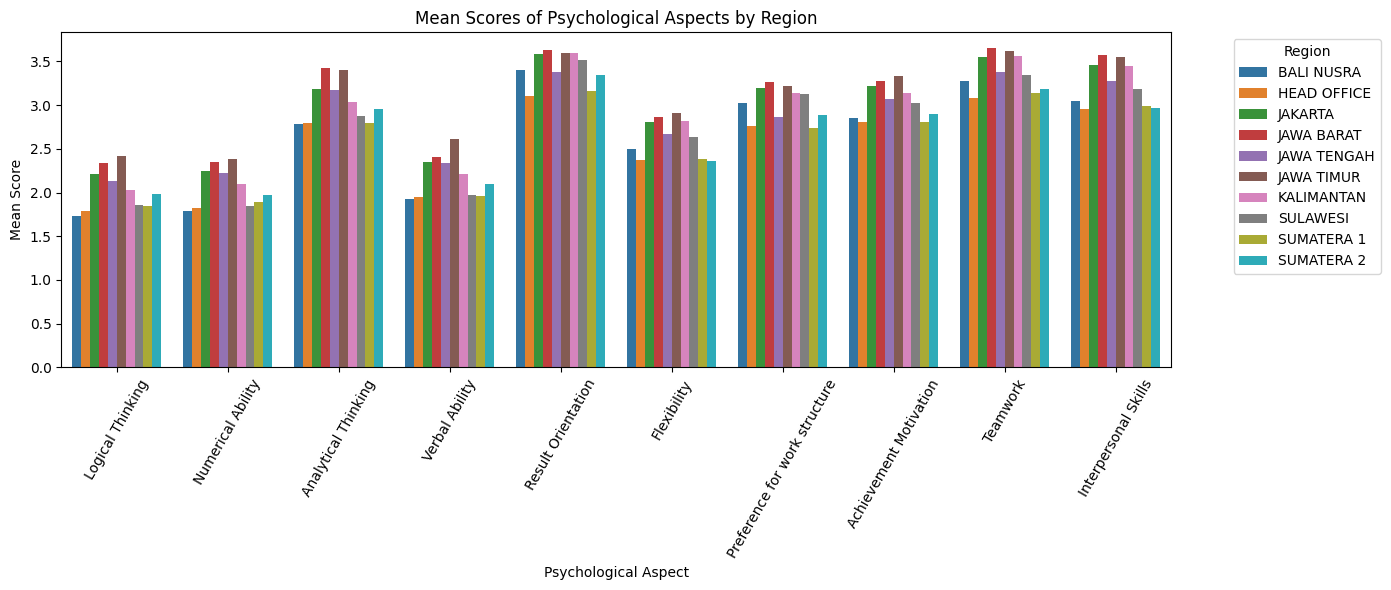

In [82]:
mean_by_region_plot = mean_by_region.reset_index().melt(id_vars='Region', var_name='Psychological Aspect', value_name='Mean Score')

# Create a bar plot
plt.figure(figsize=(14, 6))
sns.barplot(data=mean_by_region_plot, x='Psychological Aspect', y='Mean Score', hue='Region')
plt.title('Mean Scores of Psychological Aspects by Region')
plt.xticks(rotation=60)
plt.xlabel('Psychological Aspect')
plt.ylabel('Mean Score')
plt.legend(
    title='Region',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)
plt.tight_layout()
plt.show()

### Visualization of Distribution Proportion

In [83]:
for col in aspect_cols:
    print(f"Distribution of Proportion: {col}")
    print(df_region.groupby('Region')[col].value_counts(normalize=True).unstack().fillna(0))
    print("\n" + "-"*50 + "\n")

Distribution of Proportion: Logical Thinking
Logical Thinking         1         2         3         4         5
Region                                                            
BALI NUSRA        0.426396  0.421320  0.142132  0.010152  0.000000
HEAD OFFICE       0.382212  0.455529  0.151442  0.010817  0.000000
JAKARTA           0.228593  0.403670  0.297401  0.069572  0.000765
JAWA BARAT        0.190476  0.383220  0.328798  0.095238  0.002268
JAWA TENGAH       0.206612  0.491736  0.260331  0.041322  0.000000
JAWA TIMUR        0.115000  0.420000  0.395000  0.070000  0.000000
KALIMANTAN        0.270492  0.471311  0.217213  0.040984  0.000000
SULAWESI          0.371032  0.428571  0.176587  0.023810  0.000000
SUMATERA 1        0.337838  0.488417  0.164093  0.009653  0.000000
SUMATERA 2        0.278027  0.506726  0.170404  0.044843  0.000000

--------------------------------------------------

Distribution of Proportion: Numerical Ability
Numerical Ability         1         2         3     

Distribution of Proportion: Logical Thinking


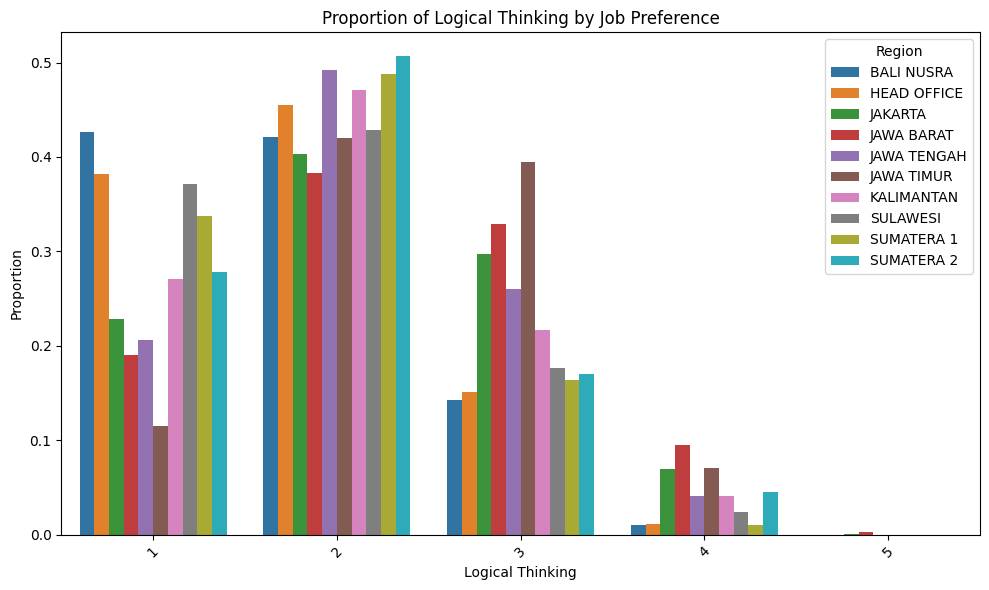


--------------------------------------------------

Distribution of Proportion: Numerical Ability


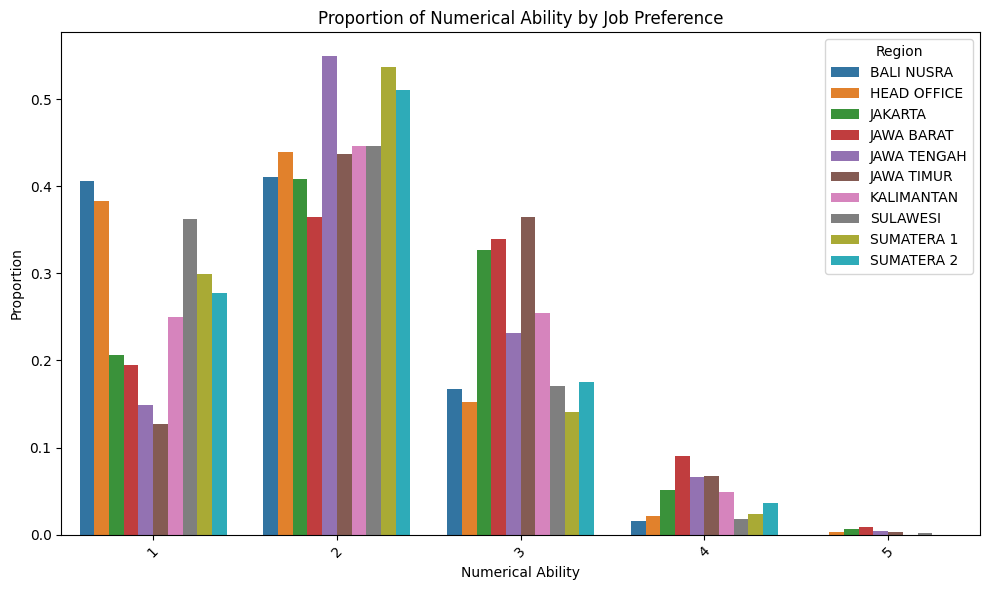


--------------------------------------------------

Distribution of Proportion: Analytical Thinking


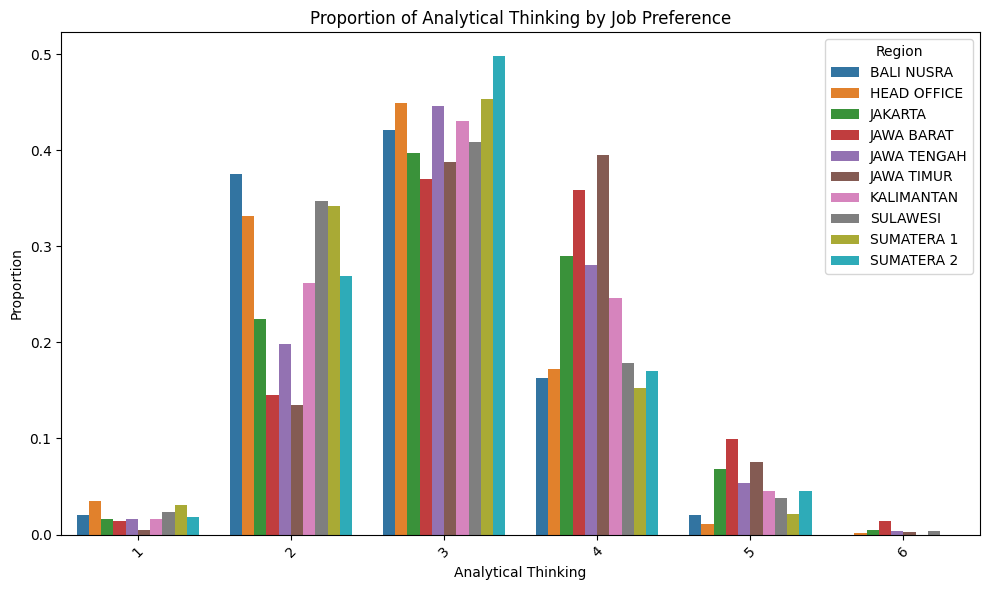


--------------------------------------------------

Distribution of Proportion: Verbal Ability


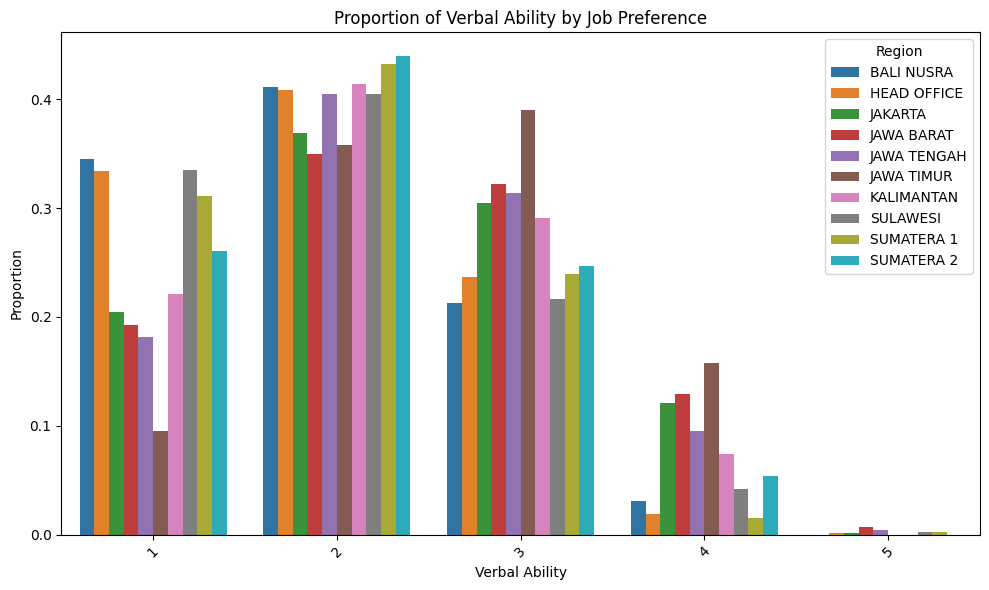


--------------------------------------------------

Distribution of Proportion: Result Orientation


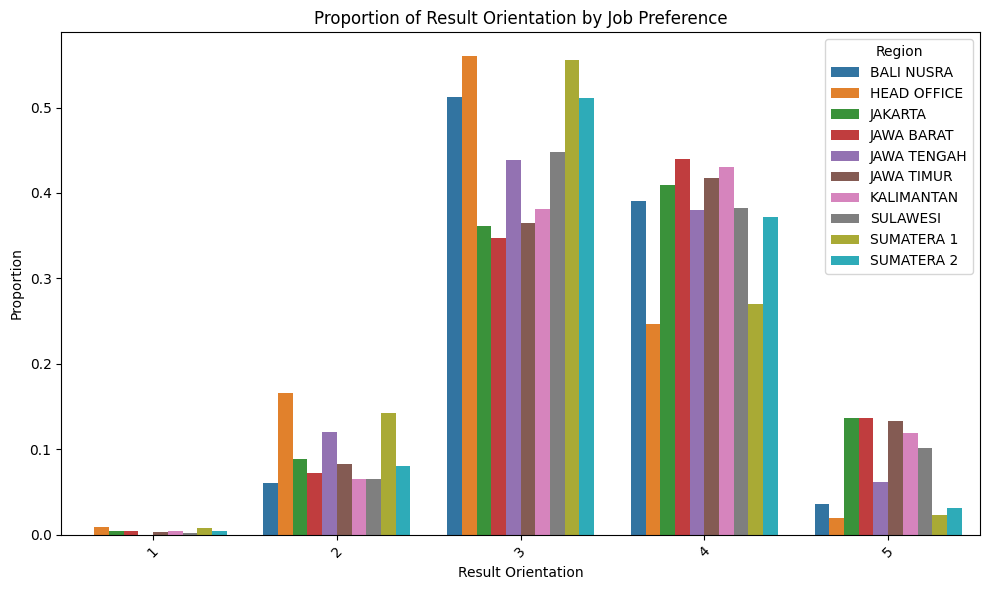


--------------------------------------------------

Distribution of Proportion: Flexibility


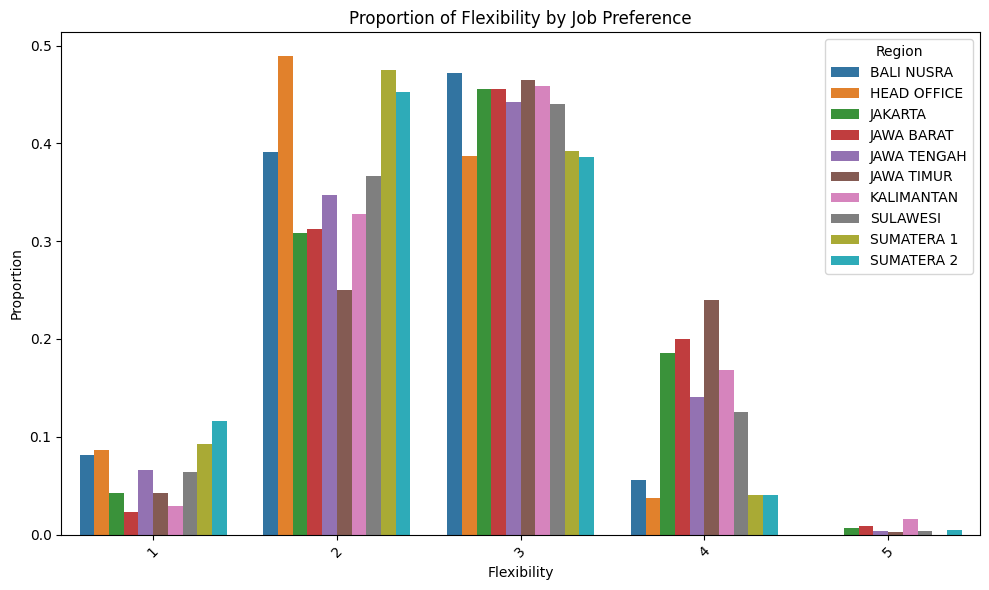


--------------------------------------------------

Distribution of Proportion: Preference for work structure


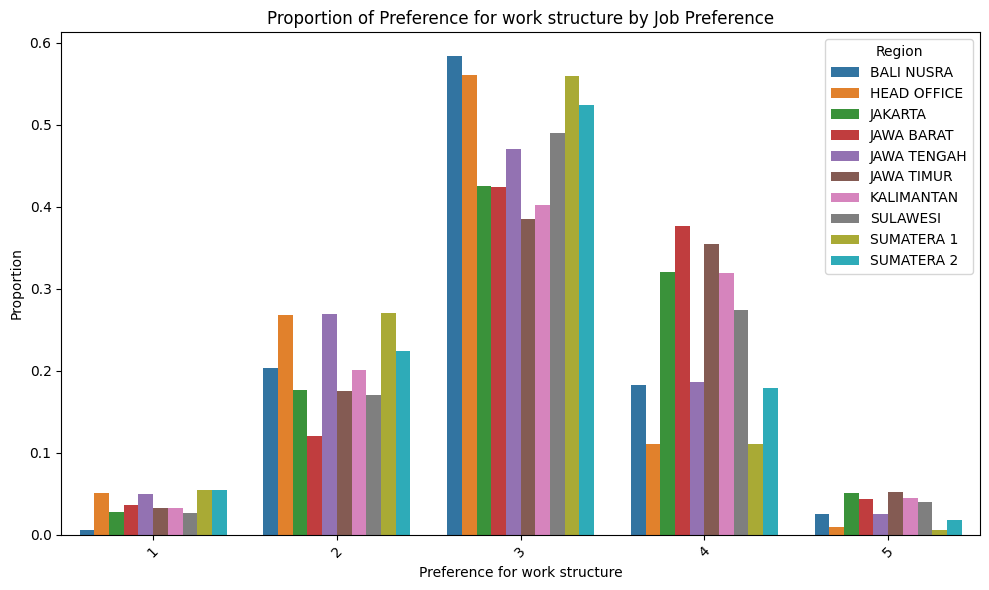


--------------------------------------------------

Distribution of Proportion: Achievement Motivation


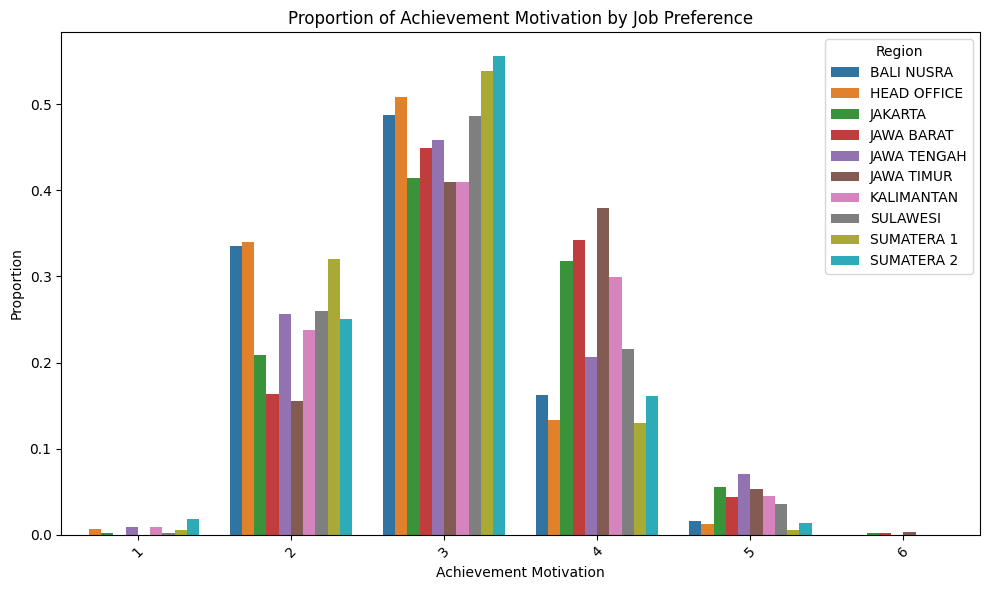


--------------------------------------------------

Distribution of Proportion: Teamwork


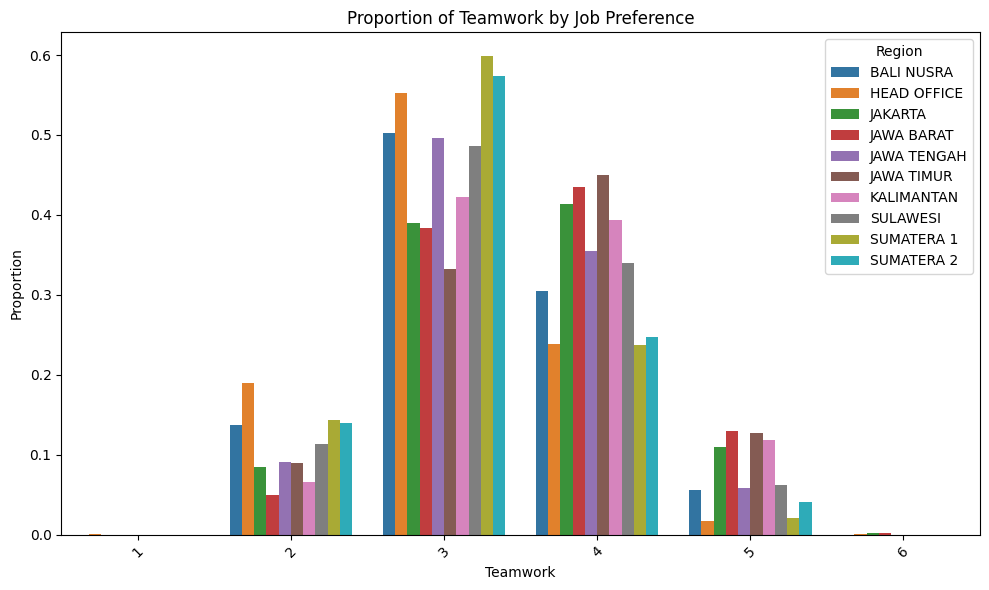


--------------------------------------------------

Distribution of Proportion: Interpersonal Skills


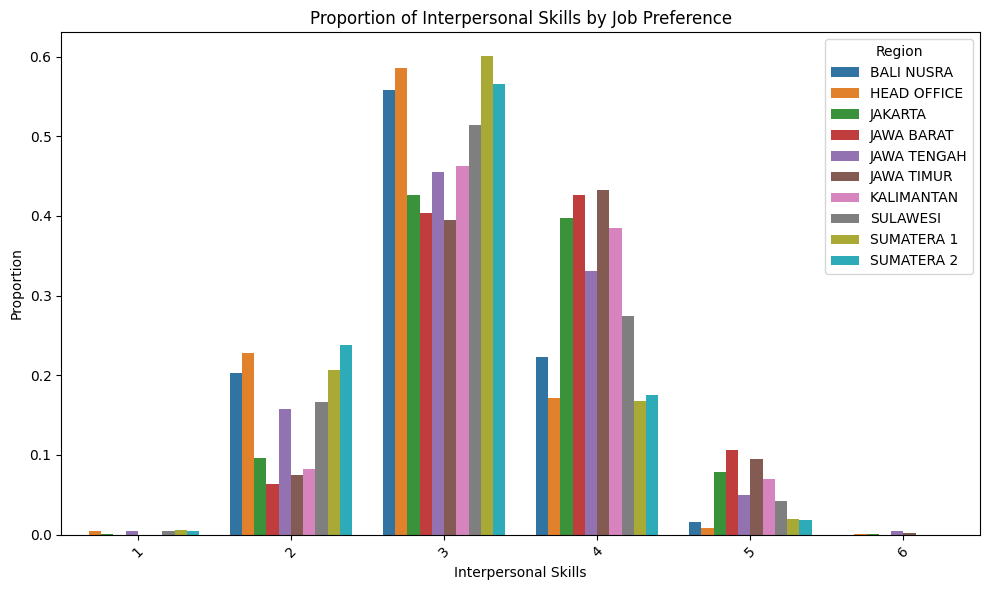


--------------------------------------------------



In [84]:
for col in aspect_cols:
    print(f"Distribution of Proportion: {col}")
    
    # Hitung proporsi tiap skor dalam kolom psikologis, dikelompokkan berdasarkan preferensi jabatan
    prop_df_region = df_region.groupby('Region')[col].value_counts(normalize=True).unstack().fillna(0)

    # Ubah format untuk visualisasi
    prop_df_region = prop_df_region.reset_index().melt(id_vars='Region', var_name=col, value_name='proportion')

    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(data=prop_df_region, x=col, y='proportion', hue='Region')
    plt.title(f'Proportion of {col} by Job Preference')
    plt.ylabel('Proportion')
    plt.xlabel(col)
    plt.legend(title='Region')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    print("\n" + "-"*50 + "\n")


## Normality Test

In [85]:
from scipy.stats import shapiro

# create dictionary to store results
normality_results = {}

# loop for each aspect and each region
for aspect in aspect_cols:
    for region in df_region['Region'].unique():
        subset = df_region[df_region['Region'] == region][aspect]
        if len(subset) >= 3:  # Shapiro needs at least 3 data points
            stat, p_value = shapiro(subset)
            normality_results[(aspect, region)] = p_value
        else:
            normality_results[(aspect, region)] = None  # for cases with insufficient data

# convert results to DataFrame
normality_df = pd.DataFrame.from_dict(normality_results, orient='index', columns=['p_value'])
normality_df.index = pd.MultiIndex.from_tuples(normality_df.index, names=['Aspect', 'Region'])

# add colom for significance level
def interpret_p(p):
    if p is None:
        return 'Insufficient data'
    elif p < 0.05:
        return 'Not Normal (significant)'
    else:
        return 'Normal (not significant)'

normality_df['Interpretation'] = normality_df['p_value'].apply(interpret_p)

# show results
print(normality_df.round(4))

                                  p_value            Interpretation
Aspect               Region                                        
Logical Thinking     BALI NUSRA       0.0  Not Normal (significant)
                     HEAD OFFICE      0.0  Not Normal (significant)
                     JAKARTA          0.0  Not Normal (significant)
                     JAWA BARAT       0.0  Not Normal (significant)
                     JAWA TENGAH      0.0  Not Normal (significant)
...                                   ...                       ...
Interpersonal Skills JAWA TIMUR       0.0  Not Normal (significant)
                     KALIMANTAN       0.0  Not Normal (significant)
                     SULAWESI         0.0  Not Normal (significant)
                     SUMATERA 1       0.0  Not Normal (significant)
                     SUMATERA 2       0.0  Not Normal (significant)

[100 rows x 2 columns]


because data is not normal, so this is data is not parametrik, So I choose kruskall walls as a method for non-parametrik

## Test of difference between groups

### Kruskall Test

In [86]:
kruskal_results = {}

# loop for each aspect
for aspect in aspect_cols:
    # get data for each region
    groups = [df_region[df_region['Region'] == region][aspect].dropna() for region in df_region['Region'].unique()]
    
    # perform Kruskal-Wallis test
    stat, p_value = kruskal(*groups)
    
    # store results
    kruskal_results[aspect] = {'statistic': stat, 'p_value': p_value}

# convert results to DataFrame
kruskal_df = pd.DataFrame.from_dict(kruskal_results, orient='index')
kruskal_df['Interpretation'] = kruskal_df['p_value'].apply(lambda p: 'Significant' if p < 0.05 else 'Not Significant')
# show results
print(kruskal_df.round(4))

                               statistic  p_value Interpretation
Logical Thinking                340.4594      0.0    Significant
Numerical Ability               328.8189      0.0    Significant
Analytical Thinking             319.3232      0.0    Significant
Verbal Ability                  284.0623      0.0    Significant
Result Orientation              311.0760      0.0    Significant
Flexibility                     316.9058      0.0    Significant
Preference for work structure   287.3456      0.0    Significant
Achievement Motivation          281.1264      0.0    Significant
Teamwork                        352.8134      0.0    Significant
Interpersonal Skills            475.7021      0.0    Significant


All categories (Region) were found to differ significantly in terms of psychological aspects. Then, next method is test Dunn to see what the different for pair group

### Test Dunn Post Hoc

In [87]:
import scikit_posthocs as sp

In [88]:
for aspek in aspect_cols:
    print(f"\nTest Dunn for {aspek}")
    posthoc = sp.posthoc_dunn(df_region, val_col=aspek, group_col='Region', p_adjust='bonferroni')
    
    styled_posthoc = posthoc.style.map(
        lambda val: 'color: red' if val < 0.05 else ''
    ).format("{:.5f}")

    display(styled_posthoc)


Test Dunn for Logical Thinking


,BALI NUSRA,HEAD OFFICE,JAKARTA,JAWA BARAT,JAWA TENGAH,JAWA TIMUR,KALIMANTAN,SULAWESI,SUMATERA 1,SUMATERA 2
BALI NUSRA,1.00000,1.00000,0.00000,0.00000,0.00001,0.00000,0.00984,1.00000,1.00000,0.12457
HEAD OFFICE,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00458,1.00000,1.00000,0.14925
JAKARTA,0.00000,0.00000,1.00000,0.55794,1.00000,0.00009,0.13276,0.00000,0.00000,0.00933
JAWA BARAT,0.00000,0.00000,0.55794,1.00000,0.44623,1.00000,0.00069,0.00000,0.00000,0.00003
JAWA TENGAH,0.00001,0.00000,1.00000,0.44623,1.00000,0.00137,1.00000,0.00030,0.00033,1.00000
JAWA TIMUR,0.00000,0.00000,0.00009,1.00000,0.00137,1.00000,0.00000,0.00000,0.00000,0.00000
KALIMANTAN,0.00984,0.00458,0.13276,0.00069,1.00000,0.00000,1.00000,0.27515,0.30049,1.00000
SULAWESI,1.00000,1.00000,0.00000,0.00000,0.00030,0.00000,0.27515,1.00000,1.00000,1.00000
SUMATERA 1,1.00000,1.00000,0.00000,0.00000,0.00033,0.00000,0.30049,1.00000,1.00000,1.00000
SUMATERA 2,0.12457,0.14925,0.00933,0.00003,1.00000,0.00000,1.00000,1.00000,1.00000,1.00000



Test Dunn for Numerical Ability


,BALI NUSRA,HEAD OFFICE,JAKARTA,JAWA BARAT,JAWA TENGAH,JAWA TIMUR,KALIMANTAN,SULAWESI,SUMATERA 1,SUMATERA 2
BALI NUSRA,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00399,1.00000,1.00000,1.00000
HEAD OFFICE,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00008,1.00000,1.00000,0.58424
JAKARTA,0.00000,0.00000,1.00000,1.00000,1.00000,0.10876,0.78993,0.00000,0.00000,0.00029
JAWA BARAT,0.00000,0.00000,1.00000,1.00000,1.00000,1.00000,0.02781,0.00000,0.00000,0.00001
JAWA TENGAH,0.00000,0.00000,1.00000,1.00000,1.00000,0.70224,1.00000,0.00000,0.00002,0.04889
JAWA TIMUR,0.00000,0.00000,0.10876,1.00000,0.70224,1.00000,0.00136,0.00000,0.00000,0.00000
KALIMANTAN,0.00399,0.00008,0.78993,0.02781,1.00000,0.00136,1.00000,0.00378,0.04596,1.00000
SULAWESI,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00378,1.00000,1.00000,1.00000
SUMATERA 1,1.00000,1.00000,0.00000,0.00000,0.00002,0.00000,0.04596,1.00000,1.00000,1.00000
SUMATERA 2,1.00000,0.58424,0.00029,0.00001,0.04889,0.00000,1.00000,1.00000,1.00000,1.00000



Test Dunn for Analytical Thinking


,BALI NUSRA,HEAD OFFICE,JAKARTA,JAWA BARAT,JAWA TENGAH,JAWA TIMUR,KALIMANTAN,SULAWESI,SUMATERA 1,SUMATERA 2
BALI NUSRA,1.00000,1.00000,0.00000,0.00000,0.00022,0.00000,0.09765,1.00000,1.00000,1.00000
HEAD OFFICE,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.01073,1.00000,1.00000,1.00000
JAKARTA,0.00000,0.00000,1.00000,0.00011,1.00000,0.00012,1.00000,0.00000,0.00000,0.02122
JAWA BARAT,0.00000,0.00000,0.00011,1.00000,0.04295,1.00000,0.00001,0.00000,0.00000,0.00000
JAWA TENGAH,0.00022,0.00000,1.00000,0.04295,1.00000,0.03649,1.00000,0.00030,0.00000,0.33129
JAWA TIMUR,0.00000,0.00000,0.00012,1.00000,0.03649,1.00000,0.00001,0.00000,0.00000,0.00000
KALIMANTAN,0.09765,0.01073,1.00000,0.00001,1.00000,0.00001,1.00000,0.36057,0.01368,1.00000
SULAWESI,1.00000,1.00000,0.00000,0.00000,0.00030,0.00000,0.36057,1.00000,1.00000,1.00000
SUMATERA 1,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.01368,1.00000,1.00000,1.00000
SUMATERA 2,1.00000,1.00000,0.02122,0.00000,0.33129,0.00000,1.00000,1.00000,1.00000,1.00000



Test Dunn for Verbal Ability


,BALI NUSRA,HEAD OFFICE,JAKARTA,JAWA BARAT,JAWA TENGAH,JAWA TIMUR,KALIMANTAN,SULAWESI,SUMATERA 1,SUMATERA 2
BALI NUSRA,1.00000,1.00000,0.00000,0.00000,0.00017,0.00000,0.03578,1.00000,1.00000,1.00000
HEAD OFFICE,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00190,1.00000,1.00000,1.00000
JAKARTA,0.00000,0.00000,1.00000,1.00000,1.00000,0.00001,1.00000,0.00000,0.00000,0.01163
JAWA BARAT,0.00000,0.00000,1.00000,1.00000,1.00000,0.02722,0.79871,0.00000,0.00000,0.00323
JAWA TENGAH,0.00017,0.00000,1.00000,1.00000,1.00000,0.00882,1.00000,0.00001,0.00002,0.23134
JAWA TIMUR,0.00000,0.00000,0.00001,0.02722,0.00882,1.00000,0.00001,0.00000,0.00000,0.00000
KALIMANTAN,0.03578,0.00190,1.00000,0.79871,1.00000,0.00001,1.00000,0.01416,0.01942,1.00000
SULAWESI,1.00000,1.00000,0.00000,0.00000,0.00001,0.00000,0.01416,1.00000,1.00000,1.00000
SUMATERA 1,1.00000,1.00000,0.00000,0.00000,0.00002,0.00000,0.01942,1.00000,1.00000,1.00000
SUMATERA 2,1.00000,1.00000,0.01163,0.00323,0.23134,0.00000,1.00000,1.00000,1.00000,1.00000



Test Dunn for Result Orientation


,BALI NUSRA,HEAD OFFICE,JAKARTA,JAWA BARAT,JAWA TENGAH,JAWA TIMUR,KALIMANTAN,SULAWESI,SUMATERA 1,SUMATERA 2
BALI NUSRA,1.00000,0.00012,0.12117,0.02946,1.00000,0.24051,0.47501,1.00000,0.01362,1.00000
HEAD OFFICE,0.00012,1.00000,0.00000,0.00000,0.00004,0.00000,0.00000,0.00000,1.00000,0.00194
JAKARTA,0.12117,0.00000,1.00000,1.00000,0.02314,1.00000,1.00000,1.00000,0.00000,0.00242
JAWA BARAT,0.02946,0.00000,1.00000,1.00000,0.00596,1.00000,1.00000,0.72088,0.00000,0.00069
JAWA TENGAH,1.00000,0.00004,0.02314,0.00596,1.00000,0.07462,0.19623,1.00000,0.00940,1.00000
JAWA TIMUR,0.24051,0.00000,1.00000,1.00000,0.07462,1.00000,1.00000,1.00000,0.00000,0.01145
KALIMANTAN,0.47501,0.00000,1.00000,1.00000,0.19623,1.00000,1.00000,1.00000,0.00000,0.03961
SULAWESI,1.00000,0.00000,1.00000,0.72088,1.00000,1.00000,1.00000,1.00000,0.00000,0.61713
SUMATERA 1,0.01362,1.00000,0.00000,0.00000,0.00940,0.00000,0.00000,0.00000,1.00000,0.12693
SUMATERA 2,1.00000,0.00194,0.00242,0.00069,1.00000,0.01145,0.03961,0.61713,0.12693,1.00000



Test Dunn for Flexibility


,BALI NUSRA,HEAD OFFICE,JAKARTA,JAWA BARAT,JAWA TENGAH,JAWA TIMUR,KALIMANTAN,SULAWESI,SUMATERA 1,SUMATERA 2
BALI NUSRA,1.00000,1.00000,0.00014,0.00006,1.00000,0.00000,0.00972,1.00000,1.00000,1.00000
HEAD OFFICE,1.00000,1.00000,0.00000,0.00000,0.00001,0.00000,0.00000,0.00000,1.00000,1.00000
JAKARTA,0.00014,0.00000,1.00000,1.00000,0.92631,0.63902,1.00000,0.00511,0.00000,0.00000
JAWA BARAT,0.00006,0.00000,1.00000,1.00000,0.27206,1.00000,1.00000,0.00302,0.00000,0.00000
JAWA TENGAH,1.00000,0.00001,0.92631,0.27206,1.00000,0.00933,1.00000,1.00000,0.00014,0.00197
JAWA TIMUR,0.00000,0.00000,0.63902,1.00000,0.00933,1.00000,1.00000,0.00001,0.00000,0.00000
KALIMANTAN,0.00972,0.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.46228,0.00000,0.00000
SULAWESI,1.00000,0.00000,0.00511,0.00302,1.00000,0.00001,0.46228,1.00000,0.00001,0.00112
SUMATERA 1,1.00000,1.00000,0.00000,0.00000,0.00014,0.00000,0.00000,0.00001,1.00000,1.00000
SUMATERA 2,1.00000,1.00000,0.00000,0.00000,0.00197,0.00000,0.00000,0.00112,1.00000,1.00000



Test Dunn for Preference for work structure


,BALI NUSRA,HEAD OFFICE,JAKARTA,JAWA BARAT,JAWA TENGAH,JAWA TIMUR,KALIMANTAN,SULAWESI,SUMATERA 1,SUMATERA 2
BALI NUSRA,1.00000,0.01295,0.11913,0.00247,1.00000,0.08207,1.00000,1.00000,0.01257,1.00000
HEAD OFFICE,0.01295,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000
JAKARTA,0.11913,0.00000,1.00000,1.00000,0.00000,1.00000,1.00000,1.00000,0.00000,0.00003
JAWA BARAT,0.00247,0.00000,1.00000,1.00000,0.00000,1.00000,1.00000,0.15529,0.00000,0.00000
JAWA TENGAH,1.00000,1.00000,0.00000,0.00000,1.00000,0.00001,0.01084,0.00306,1.00000,1.00000
JAWA TIMUR,0.08207,0.00000,1.00000,1.00000,0.00001,1.00000,1.00000,1.00000,0.00000,0.00007
KALIMANTAN,1.00000,0.00000,1.00000,1.00000,0.01084,1.00000,1.00000,1.00000,0.00000,0.04353
SULAWESI,1.00000,0.00000,1.00000,0.15529,0.00306,1.00000,1.00000,1.00000,0.00000,0.01850
SUMATERA 1,0.01257,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000
SUMATERA 2,1.00000,1.00000,0.00003,0.00000,1.00000,0.00007,0.04353,0.01850,1.00000,1.00000



Test Dunn for Achievement Motivation


,BALI NUSRA,HEAD OFFICE,JAKARTA,JAWA BARAT,JAWA TENGAH,JAWA TIMUR,KALIMANTAN,SULAWESI,SUMATERA 1,SUMATERA 2
BALI NUSRA,1.00000,1.00000,0.00000,0.00000,0.42558,0.00000,0.01192,0.66821,1.00000,1.00000
HEAD OFFICE,1.00000,1.00000,0.00000,0.00000,0.00094,0.00000,0.00000,0.00011,1.00000,1.00000
JAKARTA,0.00000,0.00000,1.00000,1.00000,0.23421,0.31266,1.00000,0.00021,0.00000,0.00001
JAWA BARAT,0.00000,0.00000,1.00000,1.00000,0.03096,1.00000,1.00000,0.00006,0.00000,0.00000
JAWA TENGAH,0.42558,0.00094,0.23421,0.03096,1.00000,0.00079,1.00000,1.00000,0.00498,1.00000
JAWA TIMUR,0.00000,0.00000,0.31266,1.00000,0.00079,1.00000,0.09618,0.00000,0.00000,0.00000
KALIMANTAN,0.01192,0.00000,1.00000,1.00000,1.00000,0.09618,1.00000,1.00000,0.00001,0.13577
SULAWESI,0.66821,0.00011,0.00021,0.00006,1.00000,0.00000,1.00000,1.00000,0.00184,1.00000
SUMATERA 1,1.00000,1.00000,0.00000,0.00000,0.00498,0.00000,0.00001,0.00184,1.00000,1.00000
SUMATERA 2,1.00000,1.00000,0.00001,0.00000,1.00000,0.00000,0.13577,1.00000,1.00000,1.00000



Test Dunn for Teamwork


,BALI NUSRA,HEAD OFFICE,JAKARTA,JAWA BARAT,JAWA TENGAH,JAWA TIMUR,KALIMANTAN,SULAWESI,SUMATERA 1,SUMATERA 2
BALI NUSRA,1.00000,0.08347,0.00020,0.00000,1.00000,0.00002,0.00861,1.00000,1.00000,1.00000
HEAD OFFICE,0.08347,1.00000,0.00000,0.00000,0.00001,0.00000,0.00000,0.00000,1.00000,1.00000
JAKARTA,0.00020,0.00000,1.00000,1.00000,0.07836,1.00000,1.00000,0.00004,0.00000,0.00000
JAWA BARAT,0.00000,0.00000,1.00000,1.00000,0.00121,1.00000,1.00000,0.00000,0.00000,0.00000
JAWA TENGAH,1.00000,0.00001,0.07836,0.00121,1.00000,0.00805,0.57661,1.00000,0.00185,0.25182
JAWA TIMUR,0.00002,0.00000,1.00000,1.00000,0.00805,1.00000,1.00000,0.00001,0.00000,0.00000
KALIMANTAN,0.00861,0.00000,1.00000,1.00000,0.57661,1.00000,1.00000,0.02957,0.00000,0.00001
SULAWESI,1.00000,0.00000,0.00004,0.00000,1.00000,0.00001,0.02957,1.00000,0.00036,0.31060
SUMATERA 1,1.00000,1.00000,0.00000,0.00000,0.00185,0.00000,0.00000,0.00036,1.00000,1.00000
SUMATERA 2,1.00000,1.00000,0.00000,0.00000,0.25182,0.00000,0.00001,0.31060,1.00000,1.00000



Test Dunn for Interpersonal Skills


,BALI NUSRA,HEAD OFFICE,JAKARTA,JAWA BARAT,JAWA TENGAH,JAWA TIMUR,KALIMANTAN,SULAWESI,SUMATERA 1,SUMATERA 2
BALI NUSRA,1.00000,1.00000,0.00000,0.00000,0.09913,0.00000,0.00001,1.00000,1.00000,1.00000
HEAD OFFICE,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00001,1.00000,1.00000
JAKARTA,0.00000,0.00000,1.00000,0.41376,0.04004,1.00000,1.00000,0.00000,0.00000,0.00000
JAWA BARAT,0.00000,0.00000,0.41376,1.00000,0.00012,1.00000,1.00000,0.00000,0.00000,0.00000
JAWA TENGAH,0.09913,0.00000,0.04004,0.00012,1.00000,0.00069,0.87290,1.00000,0.00005,0.00048
JAWA TIMUR,0.00000,0.00000,1.00000,1.00000,0.00069,1.00000,1.00000,0.00000,0.00000,0.00000
KALIMANTAN,0.00001,0.00000,1.00000,1.00000,0.87290,1.00000,1.00000,0.00078,0.00000,0.00000
SULAWESI,1.00000,0.00001,0.00000,0.00000,1.00000,0.00000,0.00078,1.00000,0.00172,0.01731
SUMATERA 1,1.00000,1.00000,0.00000,0.00000,0.00005,0.00000,0.00000,0.00172,1.00000,1.00000
SUMATERA 2,1.00000,1.00000,0.00000,0.00000,0.00048,0.00000,0.00000,0.01731,1.00000,1.00000


Visualization of Test Dunn Post-Hoc


Test Dunn Post-Hoc for Logical Thinking


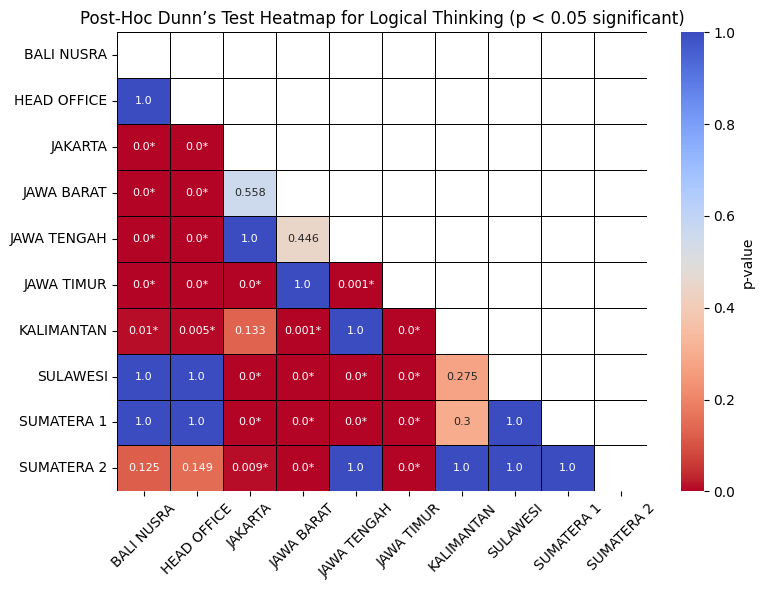


Test Dunn Post-Hoc for Numerical Ability


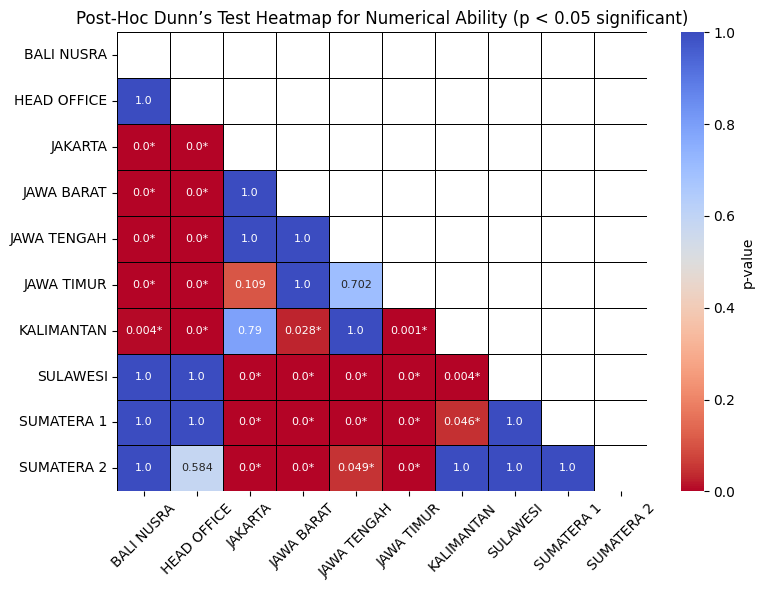


Test Dunn Post-Hoc for Analytical Thinking


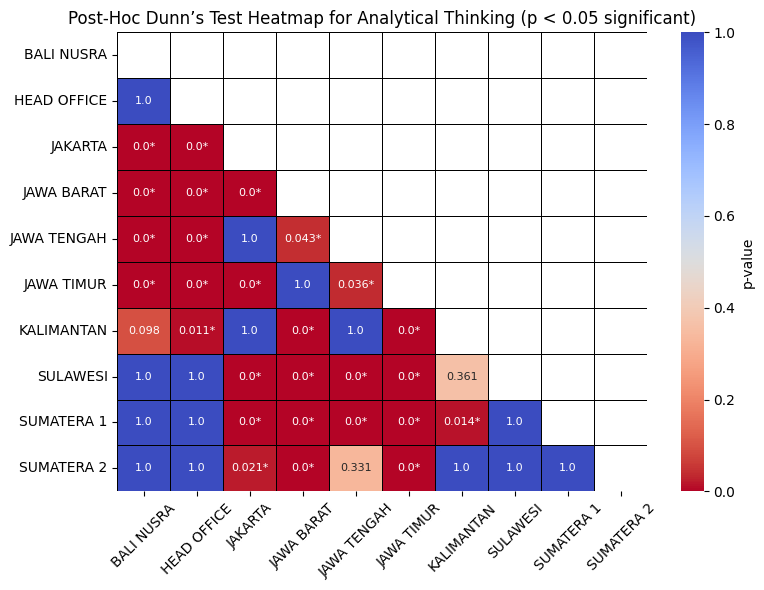


Test Dunn Post-Hoc for Verbal Ability


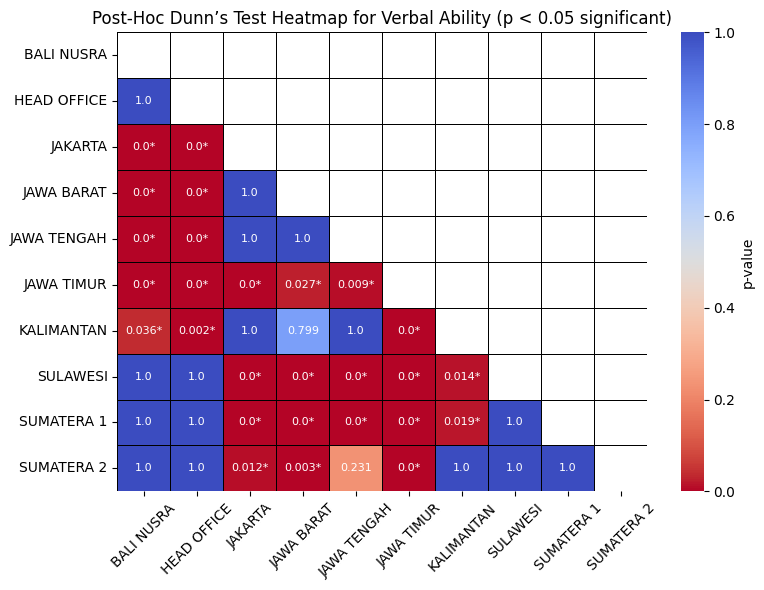


Test Dunn Post-Hoc for Result Orientation


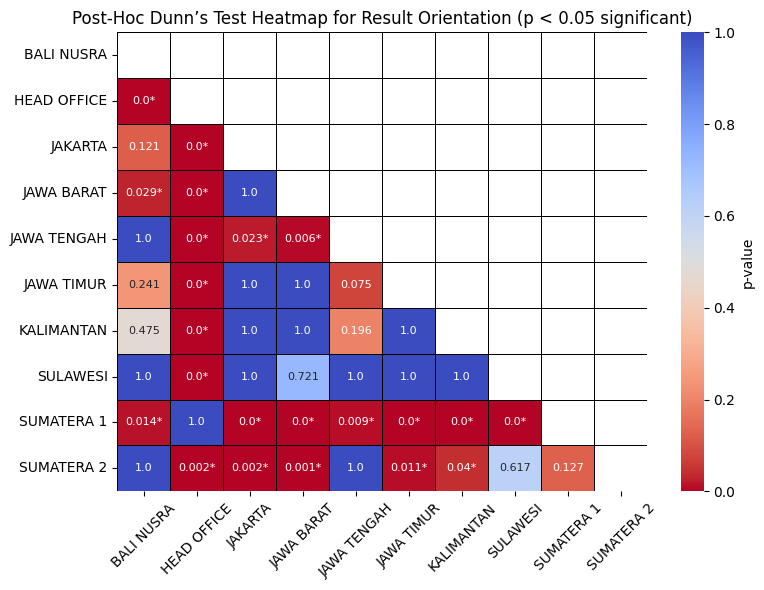


Test Dunn Post-Hoc for Flexibility


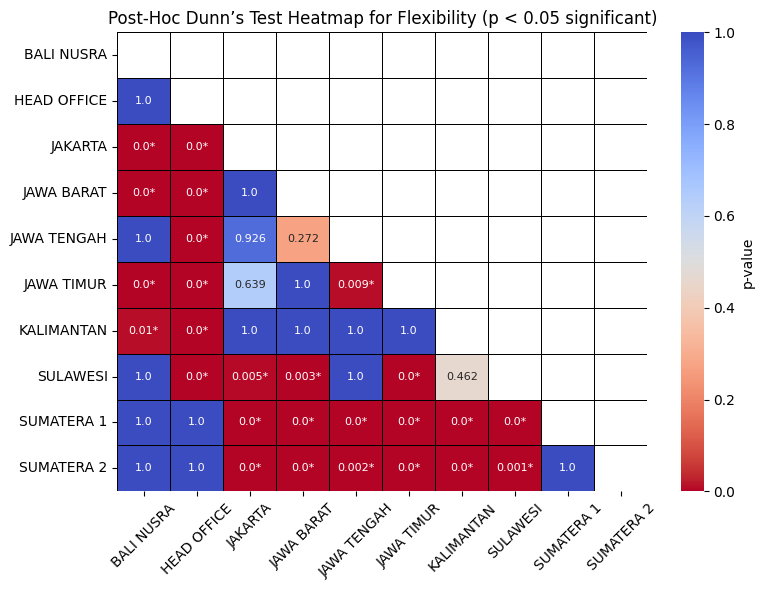


Test Dunn Post-Hoc for Preference for work structure


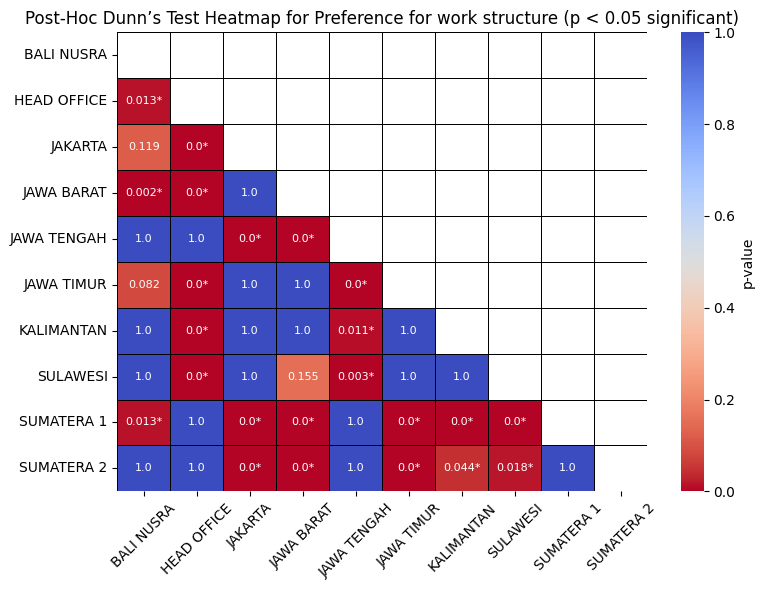


Test Dunn Post-Hoc for Achievement Motivation


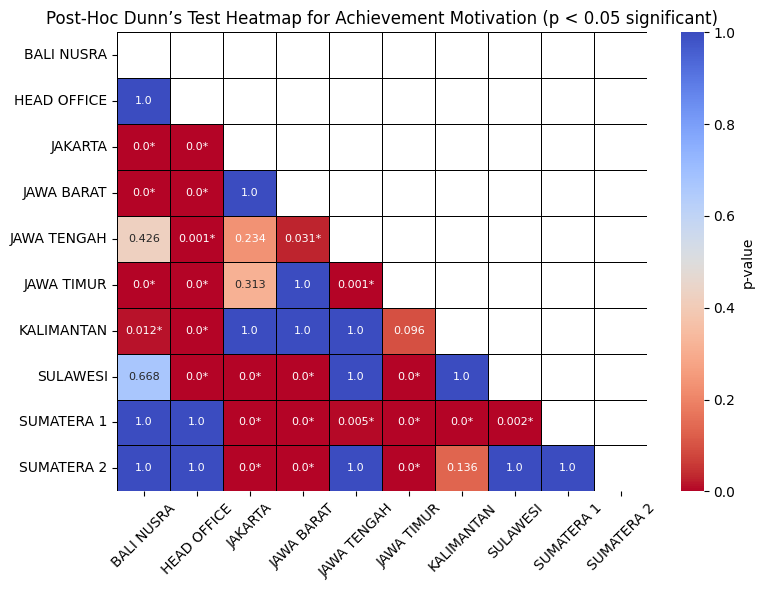


Test Dunn Post-Hoc for Teamwork


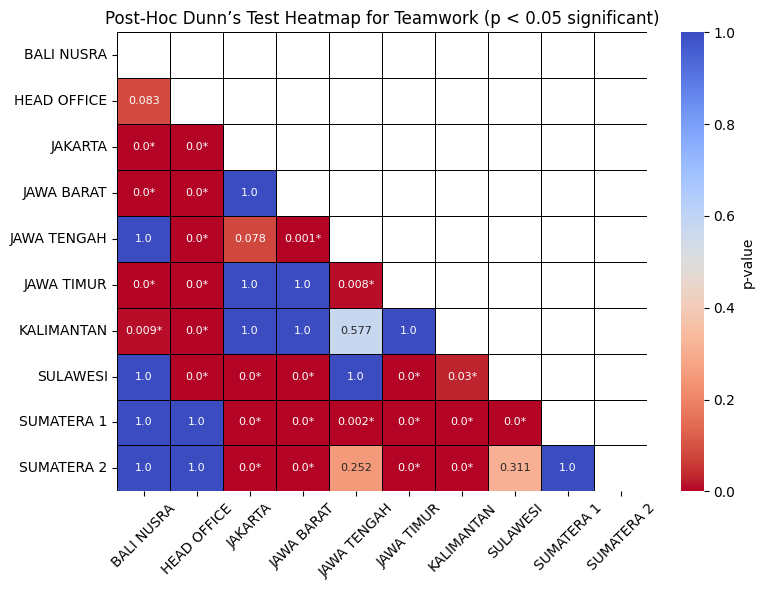


Test Dunn Post-Hoc for Interpersonal Skills


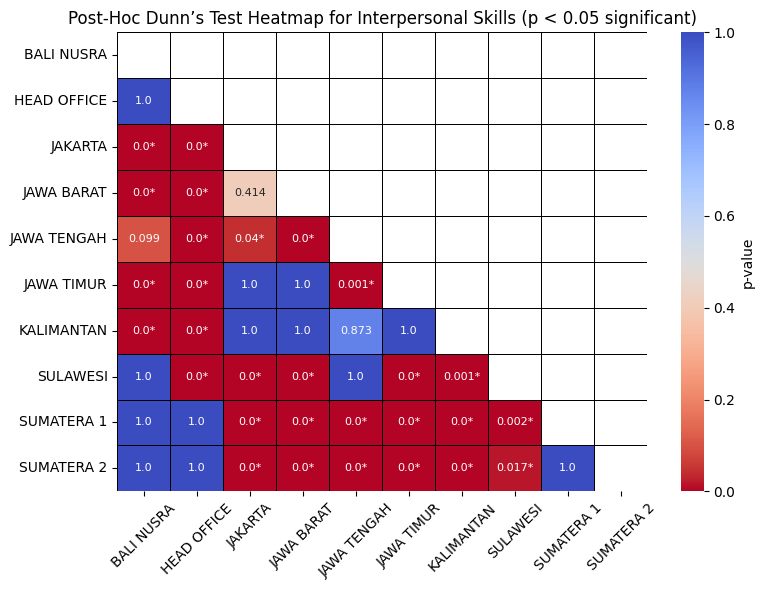

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

for aspek in aspect_cols:
    print(f"\nTest Dunn Post-Hoc for {aspek}")

    # Calculate posthoc
    posthoc = sp.posthoc_dunn(df_region, val_col=aspek, group_col='Region', p_adjust='bonferroni')

    # Buat anotasi (* untuk signifikan)
    annot = posthoc.round(3).astype(str)
    annot = annot.where(posthoc >= 0.05, annot + "*")

    # Mask segitiga bawah agar tidak redundan
    mask = np.triu(np.ones_like(posthoc, dtype=bool))

    # Plot heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(posthoc, annot=annot, fmt='', cmap='coolwarm_r', 
                linewidths=0.5, linecolor='black', mask=mask,
                cbar_kws={'label': 'p-value'}, vmin=0, vmax=1, annot_kws={"size": 8})

    plt.title(f"Post-Hoc Dunn’s Test Heatmap for {aspek} (p < 0.05 significant)")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


## Visualization Final After Test Statistics

In [90]:

df_region_mean = df_region.groupby('Region')[aspect_cols].mean().round(2)
df_region_mean

,Logical Thinking,Numerical Ability,Analytical Thinking,Verbal Ability,Result Orientation,Flexibility,Preference for work structure,Achievement Motivation,Teamwork,Interpersonal Skills
Region,,,,,,,,,,
BALI NUSRA,1.74,1.79,2.79,1.93,3.40,2.50,3.02,2.86,3.28,3.05
HEAD OFFICE,1.79,1.82,2.80,1.94,3.10,2.38,2.76,2.81,3.08,2.95
JAKARTA,2.21,2.24,3.18,2.35,3.58,2.81,3.19,3.22,3.55,3.46
JAWA BARAT,2.34,2.35,3.43,2.41,3.63,2.86,3.27,3.27,3.65,3.58
JAWA TENGAH,2.14,2.23,3.17,2.33,3.38,2.67,2.87,3.07,3.38,3.28
JAWA TIMUR,2.42,2.38,3.41,2.61,3.60,2.91,3.22,3.34,3.62,3.56
KALIMANTAN,2.03,2.10,3.04,2.22,3.59,2.82,3.14,3.14,3.57,3.44
SULAWESI,1.85,1.85,2.87,1.97,3.52,2.64,3.13,3.02,3.35,3.18
SUMATERA 1,1.85,1.89,2.79,1.97,3.16,2.38,2.74,2.81,3.14,2.99


In [91]:
mean_by_region_plot

,Region,Psychological Aspect,Mean Score
0,BALI NUSRA,Logical Thinking,1.736041
1,HEAD OFFICE,Logical Thinking,1.790865
2,JAKARTA,Logical Thinking,2.210245
3,JAWA BARAT,Logical Thinking,2.335601
4,JAWA TENGAH,Logical Thinking,2.136364
...,...,...,...
95,JAWA TIMUR,Interpersonal Skills,3.555000
96,KALIMANTAN,Interpersonal Skills,3.442623
97,SULAWESI,Interpersonal Skills,3.182540
98,SUMATERA 1,Interpersonal Skills,2.988417


In [92]:
mean_by_region_plot = df_region_mean.reset_index().melt(id_vars='Region', var_name='Psychological Aspect', value_name='Mean Score')
mean_by_region_plot

,Region,Psychological Aspect,Mean Score
0,BALI NUSRA,Logical Thinking,1.74
1,HEAD OFFICE,Logical Thinking,1.79
2,JAKARTA,Logical Thinking,2.21
3,JAWA BARAT,Logical Thinking,2.34
4,JAWA TENGAH,Logical Thinking,2.14
...,...,...,...
95,JAWA TIMUR,Interpersonal Skills,3.56
96,KALIMANTAN,Interpersonal Skills,3.44
97,SULAWESI,Interpersonal Skills,3.18
98,SUMATERA 1,Interpersonal Skills,2.99


In [93]:
logical_thinking = mean_by_region_plot[mean_by_region_plot['Psychological Aspect'] == 'Logical Thinking']
logical_thinking

,Region,Psychological Aspect,Mean Score
0,BALI NUSRA,Logical Thinking,1.74
1,HEAD OFFICE,Logical Thinking,1.79
2,JAKARTA,Logical Thinking,2.21
3,JAWA BARAT,Logical Thinking,2.34
4,JAWA TENGAH,Logical Thinking,2.14
5,JAWA TIMUR,Logical Thinking,2.42
6,KALIMANTAN,Logical Thinking,2.03
7,SULAWESI,Logical Thinking,1.85
8,SUMATERA 1,Logical Thinking,1.85
9,SUMATERA 2,Logical Thinking,1.98


In [94]:
import matplotlib.patches as mpatches

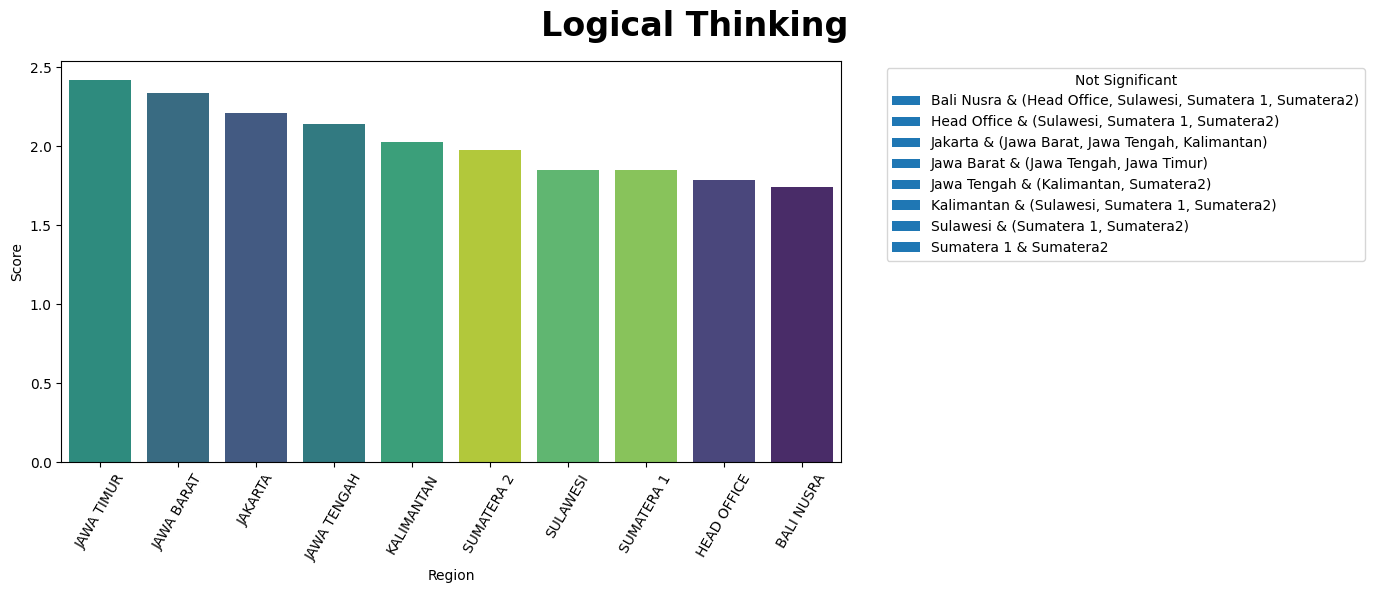

In [95]:
mean_by_region_plot = df_region_mean.reset_index().melt(id_vars='Region', var_name='Psychological Aspect', value_name='Mean Score')
logical_thinking = mean_by_region_plot[mean_by_region_plot['Psychological Aspect'] == 'Logical Thinking']
order = logical_thinking.groupby("Region")["Mean Score"].mean().sort_values(ascending=False).index

# create legend
patch1 = mpatches.Patch(label='Bali Nusra & (Head Office, Sulawesi, Sumatera 1, Sumatera2)')
patch2 = mpatches.Patch(label='Head Office & (Sulawesi, Sumatera 1, Sumatera2)')
patch3 = mpatches.Patch(label='Jakarta & (Jawa Barat, Jawa Tengah, Kalimantan)')
patch4 = mpatches.Patch(label='Jawa Barat & (Jawa Tengah, Jawa Timur)')
patch5 = mpatches.Patch(label='Jawa Tengah & (Kalimantan, Sumatera2)')
patch6 = mpatches.Patch(label='Kalimantan & (Sulawesi, Sumatera 1, Sumatera2)')
patch7 = mpatches.Patch(label='Sulawesi & (Sumatera 1, Sumatera2)')
patch8 = mpatches.Patch(label='Sumatera 1 & Sumatera2')

# Create a bar plot
plt.figure(figsize=(14, 6))
plt.suptitle('Logical Thinking', fontsize=24, fontweight='bold', x=0.5,ha='center')
sns.barplot(data=logical_thinking, x='Region', y='Mean Score', palette='viridis', hue='Region', order=order)
#plt.title('Mean Scores of Logical Thinking by Region')
plt.xticks(rotation=60)
plt.xlabel('Region')
plt.ylabel('Score')
plt.legend(
    handles=[patch1, patch2, patch3, patch4, patch5, patch6, patch7, patch8],
    title='Not Significant',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)
plt.tight_layout()
plt.show()

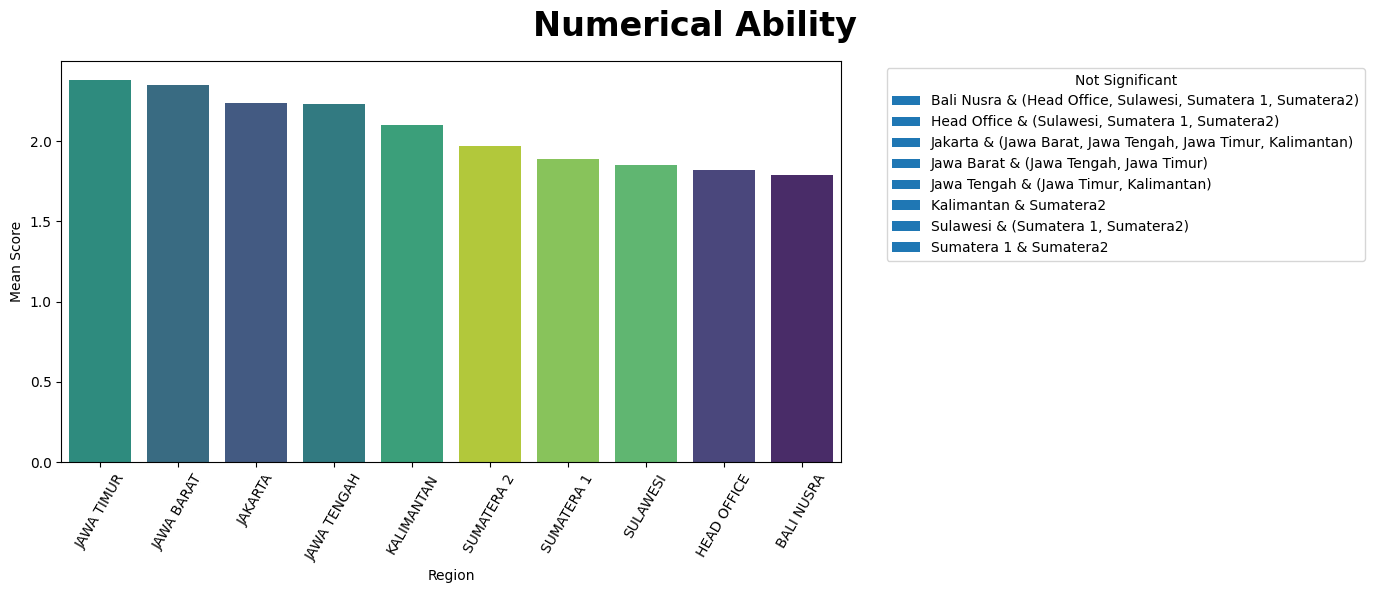

In [96]:
numerical_ablity = mean_by_region_plot[mean_by_region_plot['Psychological Aspect'] == 'Numerical Ability']
order_na = numerical_ablity.groupby("Region")["Mean Score"].mean().sort_values(ascending=False).index

# create legend
patch1 = mpatches.Patch(label='Bali Nusra & (Head Office, Sulawesi, Sumatera 1, Sumatera2)')
patch2 = mpatches.Patch(label='Head Office & (Sulawesi, Sumatera 1, Sumatera2)')
patch3 = mpatches.Patch(label='Jakarta & (Jawa Barat, Jawa Tengah, Jawa Timur, Kalimantan)')
patch4 = mpatches.Patch(label='Jawa Barat & (Jawa Tengah, Jawa Timur)')
patch5 = mpatches.Patch(label='Jawa Tengah & (Jawa Timur, Kalimantan)')
patch6 = mpatches.Patch(label='Kalimantan & Sumatera2')
patch7 = mpatches.Patch(label='Sulawesi & (Sumatera 1, Sumatera2)')
patch8 = mpatches.Patch(label='Sumatera 1 & Sumatera2')

# Create a bar plot
plt.figure(figsize=(14, 6))
plt.suptitle('Numerical Ability', fontsize=24, fontweight='bold', x=0.5,ha='center')
sns.barplot(data=numerical_ablity, x='Region', y='Mean Score', palette='viridis', hue='Region', order=order_na)
#plt.title('Mean Scores of Numerical Ability by Region')
plt.xticks(rotation=60)
plt.xlabel('Region')
plt.ylabel('Mean Score')
plt.legend(
    handles=[patch1, patch2, patch3, patch4, patch5, patch6, patch7, patch8],
    title='Not Significant',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)
plt.tight_layout()
plt.show()

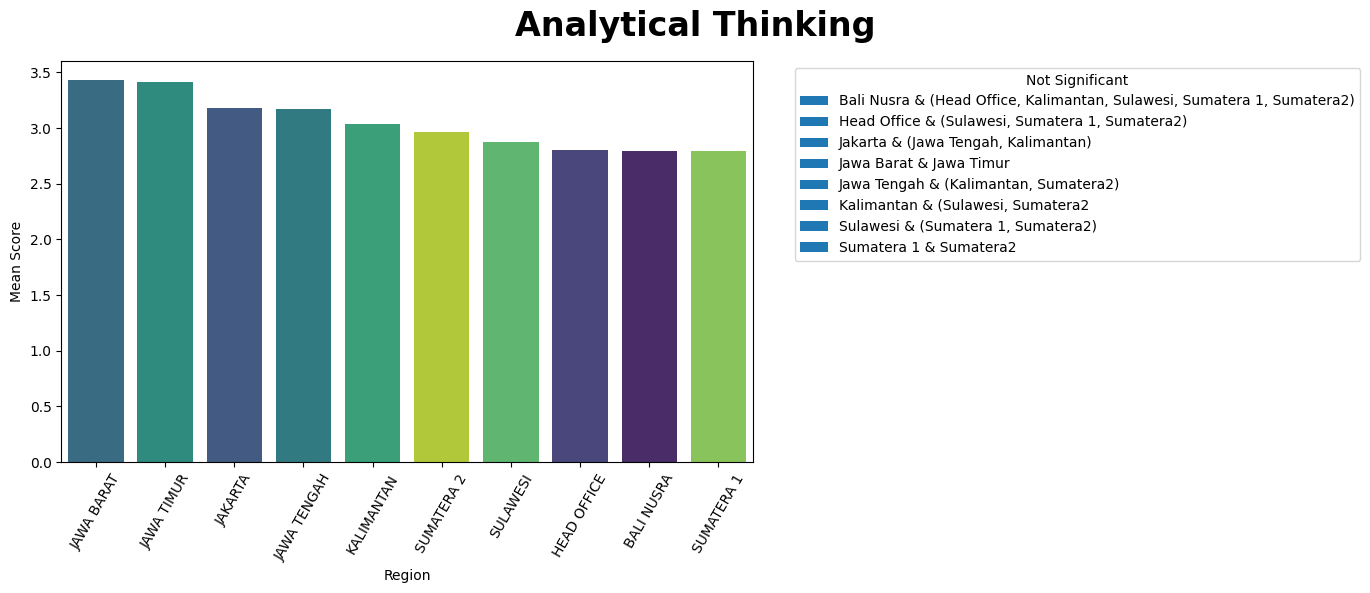

In [97]:
analytical_thinking = mean_by_region_plot[mean_by_region_plot['Psychological Aspect'] == 'Analytical Thinking']
order_at = analytical_thinking.groupby("Region")["Mean Score"].mean().sort_values(ascending=False).index

# create legend
patch1 = mpatches.Patch(label='Bali Nusra & (Head Office, Kalimantan, Sulawesi, Sumatera 1, Sumatera2)')
patch2 = mpatches.Patch(label='Head Office & (Sulawesi, Sumatera 1, Sumatera2)')
patch3 = mpatches.Patch(label='Jakarta & (Jawa Tengah, Kalimantan)')
patch4 = mpatches.Patch(label='Jawa Barat & Jawa Timur')
patch5 = mpatches.Patch(label='Jawa Tengah & (Kalimantan, Sumatera2)')
patch6 = mpatches.Patch(label='Kalimantan & (Sulawesi, Sumatera2')
patch7 = mpatches.Patch(label='Sulawesi & (Sumatera 1, Sumatera2)')
patch8 = mpatches.Patch(label='Sumatera 1 & Sumatera2')

# Create a bar plot
plt.figure(figsize=(14, 6))
plt.suptitle('Analytical Thinking', fontsize=24, fontweight='bold', x=0.5,ha='center')
sns.barplot(data=analytical_thinking, x='Region', y='Mean Score', palette='viridis', hue='Region', order=order_at)
#plt.title('Mean Scores of Analytical Thinking by Region')
plt.xticks(rotation=60)
plt.xlabel('Region')
plt.ylabel('Mean Score')
plt.legend(
    handles=[patch1, patch2, patch3, patch4, patch5, patch6, patch7, patch8],
    title='Not Significant',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)
plt.tight_layout()
plt.show()

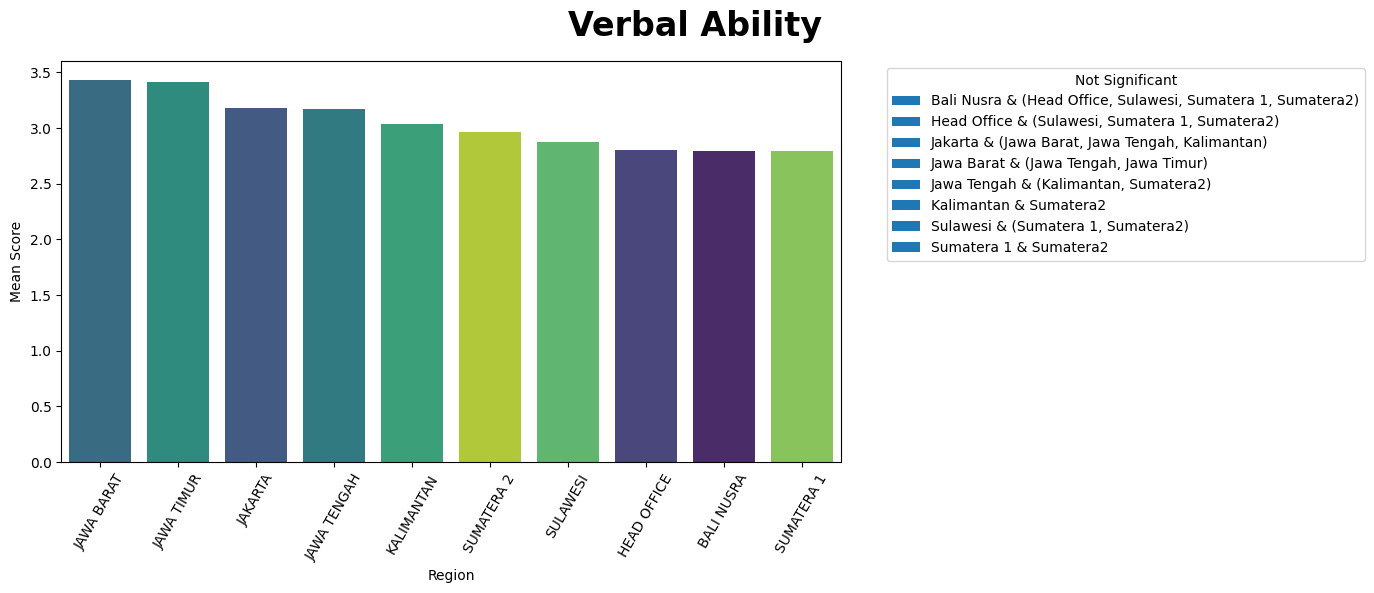

In [98]:
verbal_ability = mean_by_region_plot[mean_by_region_plot['Psychological Aspect'] == 'Verbal Ability']
order_va = analytical_thinking.groupby("Region")["Mean Score"].mean().sort_values(ascending=False).index

# create legend
patch1 = mpatches.Patch(label='Bali Nusra & (Head Office, Sulawesi, Sumatera 1, Sumatera2)')
patch2 = mpatches.Patch(label='Head Office & (Sulawesi, Sumatera 1, Sumatera2)')
patch3 = mpatches.Patch(label='Jakarta & (Jawa Barat, Jawa Tengah, Kalimantan)')
patch4 = mpatches.Patch(label='Jawa Barat & (Jawa Tengah, Jawa Timur)')
patch5 = mpatches.Patch(label='Jawa Tengah & (Kalimantan, Sumatera2)')
patch6 = mpatches.Patch(label='Kalimantan & Sumatera2')
patch7 = mpatches.Patch(label='Sulawesi & (Sumatera 1, Sumatera2)')
patch8 = mpatches.Patch(label='Sumatera 1 & Sumatera2')

# Create a bar plot
plt.figure(figsize=(14, 6))
plt.suptitle('Verbal Ability', fontsize=24, fontweight='bold', x=0.5,ha='center')
sns.barplot(data=analytical_thinking, x='Region', y='Mean Score', palette='viridis', hue='Region', order=order_va)
#plt.title('Mean Scores of Verbal Ability by Region')
plt.xticks(rotation=60)
plt.xlabel('Region')
plt.ylabel('Mean Score')
plt.legend(
    handles=[patch1, patch2, patch3, patch4, patch5, patch6, patch7, patch8],
    title='Not Significant',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)
plt.tight_layout()
plt.show()

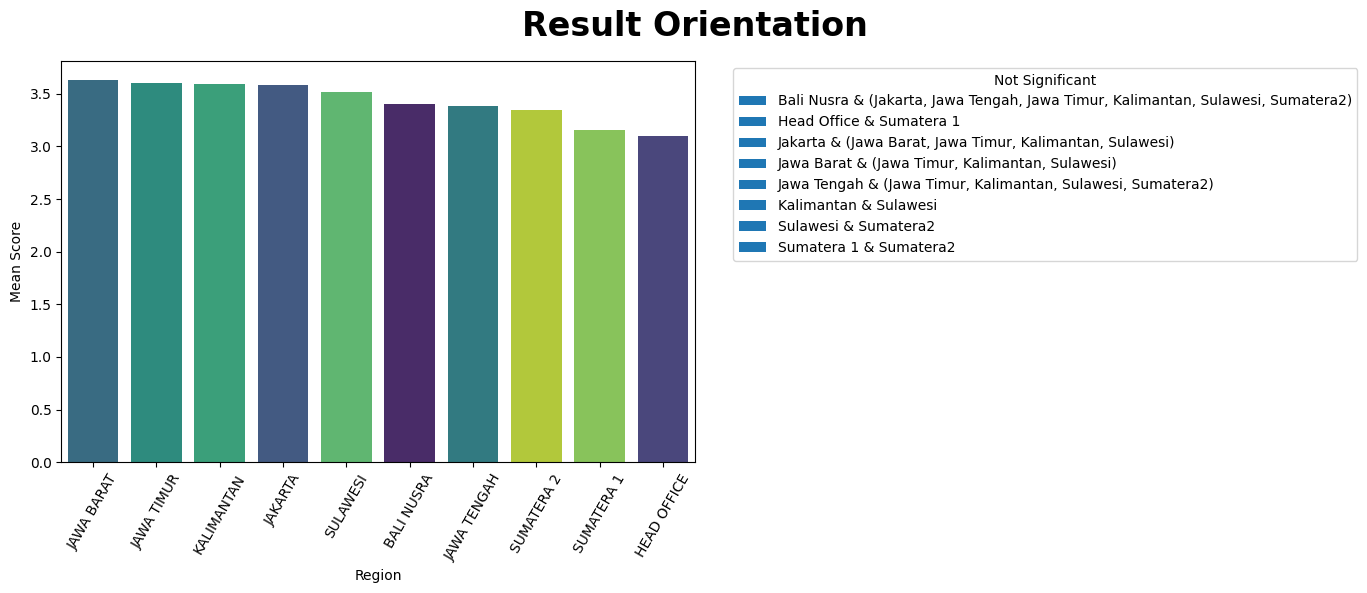

In [99]:
result_orentation = mean_by_region_plot[mean_by_region_plot['Psychological Aspect'] == 'Result Orientation']
order_ro = result_orentation.groupby("Region")["Mean Score"].mean().sort_values(ascending=False).index

# create legend
patch1 = mpatches.Patch(label='Bali Nusra & (Jakarta, Jawa Tengah, Jawa Timur, Kalimantan, Sulawesi, Sumatera2)')
patch2 = mpatches.Patch(label='Head Office & Sumatera 1')
patch3 = mpatches.Patch(label='Jakarta & (Jawa Barat, Jawa Timur, Kalimantan, Sulawesi)')
patch4 = mpatches.Patch(label='Jawa Barat & (Jawa Timur, Kalimantan, Sulawesi)')
patch5 = mpatches.Patch(label='Jawa Tengah & (Jawa Timur, Kalimantan, Sulawesi, Sumatera2)')
patch6 = mpatches.Patch(label='Kalimantan & Sulawesi')
patch7 = mpatches.Patch(label='Sulawesi & Sumatera2')
patch8 = mpatches.Patch(label='Sumatera 1 & Sumatera2')

# Create a bar plot
plt.figure(figsize=(14, 6))
plt.suptitle('Result Orientation', fontsize=24, fontweight='bold', x=0.5,ha='center')
sns.barplot(data=result_orentation, x='Region', y='Mean Score', palette='viridis', hue='Region', order=order_ro)
#plt.title('Mean Scores of Result Orientation by Region')
plt.xticks(rotation=60)
plt.xlabel('Region')
plt.ylabel('Mean Score')
plt.legend(
    handles=[patch1, patch2, patch3, patch4, patch5, patch6, patch7, patch8],
    title='Not Significant',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)
plt.tight_layout()
plt.show()

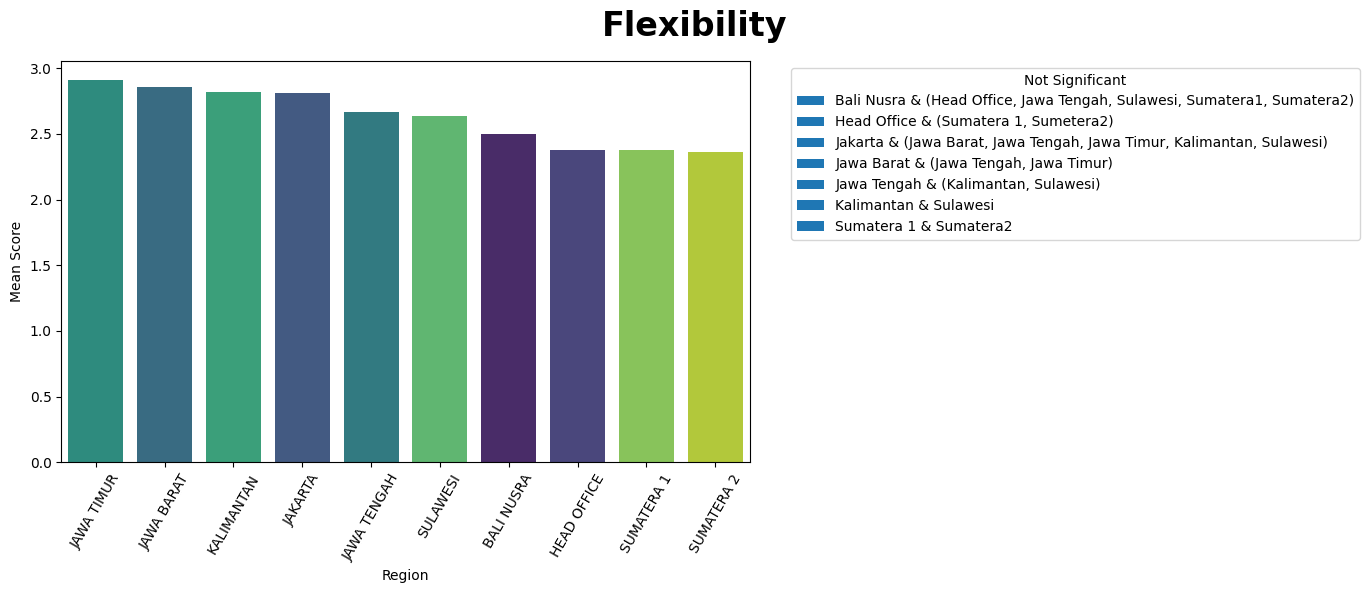

In [100]:
flexibility = mean_by_region_plot[mean_by_region_plot['Psychological Aspect'] == 'Flexibility']
order_flex = flexibility.groupby("Region")["Mean Score"].mean().sort_values(ascending=False).index

# create legend
patch1 = mpatches.Patch(label='Bali Nusra & (Head Office, Jawa Tengah, Sulawesi, Sumatera1, Sumatera2)')
patch2 = mpatches.Patch(label='Head Office & (Sumatera 1, Sumetera2)')
patch3 = mpatches.Patch(label='Jakarta & (Jawa Barat, Jawa Tengah, Jawa Timur, Kalimantan, Sulawesi)')
patch4 = mpatches.Patch(label='Jawa Barat & (Jawa Tengah, Jawa Timur)')
patch5 = mpatches.Patch(label='Jawa Tengah & (Kalimantan, Sulawesi)')
patch6 = mpatches.Patch(label='Kalimantan & Sulawesi')
patch7 = mpatches.Patch(label='Sumatera 1 & Sumatera2')

# Create a bar plot
plt.figure(figsize=(14, 6))
plt.suptitle('Flexibility', fontsize=24, fontweight='bold', x=0.5,ha='center')
sns.barplot(data=flexibility, x='Region', y='Mean Score', palette='viridis', hue='Region', order=order_flex)
#plt.title('Mean Scores of Flexibility by Region')
plt.xticks(rotation=60)
plt.xlabel('Region')
plt.ylabel('Mean Score')
plt.legend(
    handles=[patch1, patch2, patch3, patch4, patch5, patch6, patch7],
    title='Not Significant',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)
plt.tight_layout()
plt.show()

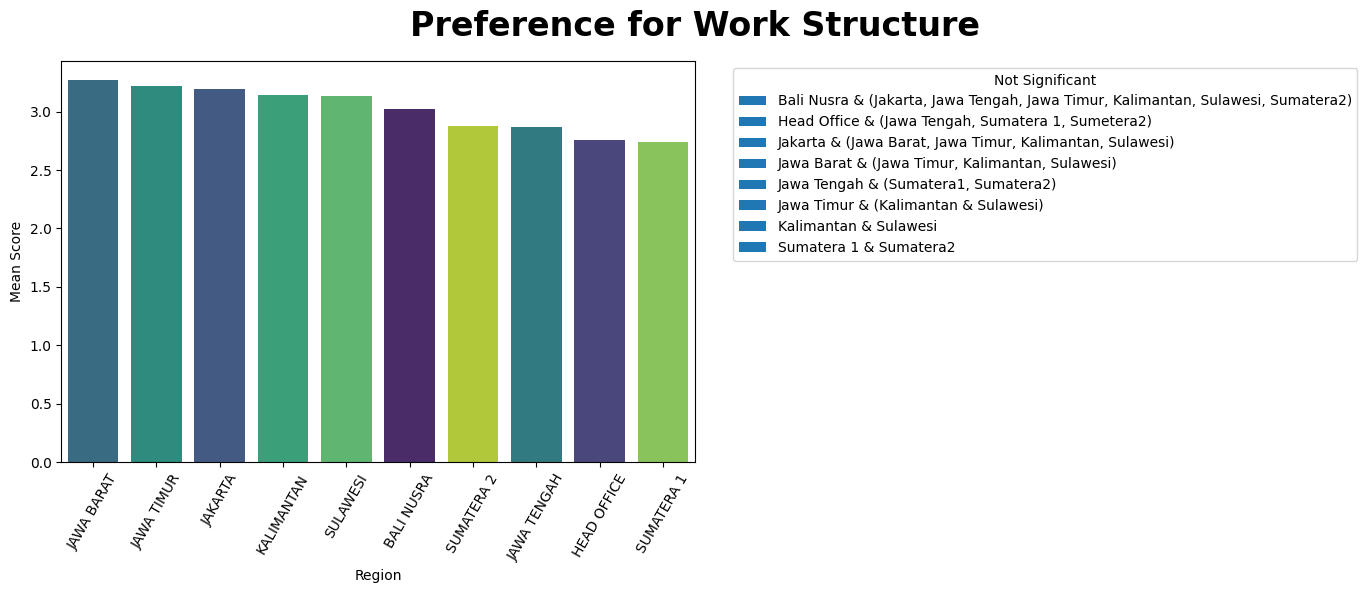

In [101]:
preference_for_structure = mean_by_region_plot[mean_by_region_plot['Psychological Aspect'] == 'Preference for work structure']
order_pfs = preference_for_structure.groupby("Region")["Mean Score"].mean().sort_values(ascending=False).index

# create legend
patch1 = mpatches.Patch(label='Bali Nusra & (Jakarta, Jawa Tengah, Jawa Timur, Kalimantan, Sulawesi, Sumatera2)')
patch2 = mpatches.Patch(label='Head Office & (Jawa Tengah, Sumatera 1, Sumetera2)')
patch3 = mpatches.Patch(label='Jakarta & (Jawa Barat, Jawa Timur, Kalimantan, Sulawesi)')
patch4 = mpatches.Patch(label='Jawa Barat & (Jawa Timur, Kalimantan, Sulawesi)')
patch5 = mpatches.Patch(label='Jawa Tengah & (Sumatera1, Sumatera2)')
patch6 = mpatches.Patch(label='Jawa Timur & (Kalimantan & Sulawesi)')
patch7 = mpatches.Patch(label='Kalimantan & Sulawesi')
patch8 = mpatches.Patch(label='Sumatera 1 & Sumatera2')

# Create a bar plot
plt.figure(figsize=(14, 6))
plt.suptitle('Preference for Work Structure', fontsize=24, fontweight='bold', x=0.5,ha='center')
sns.barplot(data=preference_for_structure, x='Region', y='Mean Score', palette='viridis', hue='Region', order=order_pfs)
#plt.title('Mean Scores of Preference for work structure by Region')
plt.xticks(rotation=60)
plt.xlabel('Region')
plt.ylabel('Mean Score')
plt.legend(
    handles=[patch1, patch2, patch3, patch4, patch5, patch6, patch7, patch8],
    title='Not Significant',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)
plt.tight_layout()
plt.show()

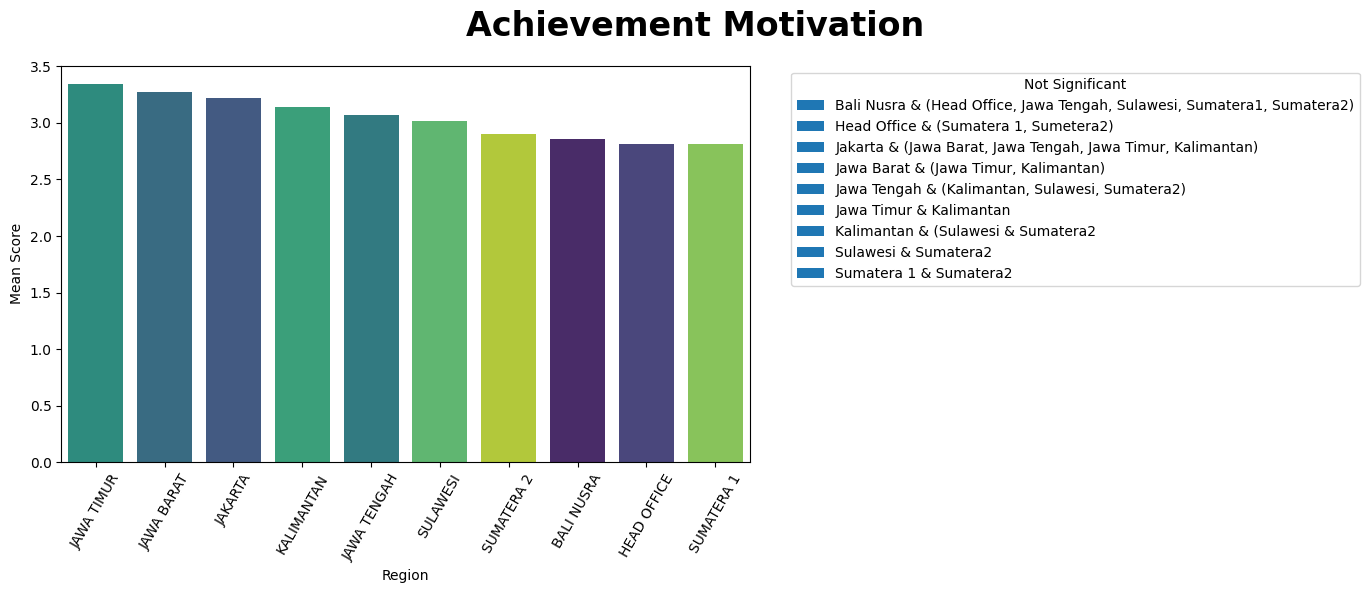

In [102]:
achievement_motivation = mean_by_region_plot[mean_by_region_plot['Psychological Aspect'] == 'Achievement Motivation']
order_am = achievement_motivation.groupby("Region")["Mean Score"].mean().sort_values(ascending=False).index

# create legend
patch1 = mpatches.Patch(label='Bali Nusra & (Head Office, Jawa Tengah, Sulawesi, Sumatera1, Sumatera2)')
patch2 = mpatches.Patch(label='Head Office & (Sumatera 1, Sumetera2)')
patch3 = mpatches.Patch(label='Jakarta & (Jawa Barat, Jawa Tengah, Jawa Timur, Kalimantan)')
patch4 = mpatches.Patch(label='Jawa Barat & (Jawa Timur, Kalimantan)')
patch5 = mpatches.Patch(label='Jawa Tengah & (Kalimantan, Sulawesi, Sumatera2)')
patch6 = mpatches.Patch(label='Jawa Timur & Kalimantan')
patch7 = mpatches.Patch(label='Kalimantan & (Sulawesi & Sumatera2')
patch8 = mpatches.Patch(label='Sulawesi & Sumatera2')
patch9 = mpatches.Patch(label='Sumatera 1 & Sumatera2')

# Create a bar plot
plt.figure(figsize=(14, 6))
plt.suptitle('Achievement Motivation', fontsize=24, fontweight='bold', x=0.5,ha='center')
sns.barplot(data=achievement_motivation, x='Region', y='Mean Score', palette='viridis', hue='Region', order=order_am)
#plt.title('Mean Scores of Achievement Motivation by Region')
plt.xticks(rotation=60)
plt.xlabel('Region')
plt.ylabel('Mean Score')
plt.legend(
    handles=[patch1, patch2, patch3, patch4, patch5, patch6, patch7, patch8, patch9],
    title='Not Significant',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)
plt.tight_layout()
plt.show()

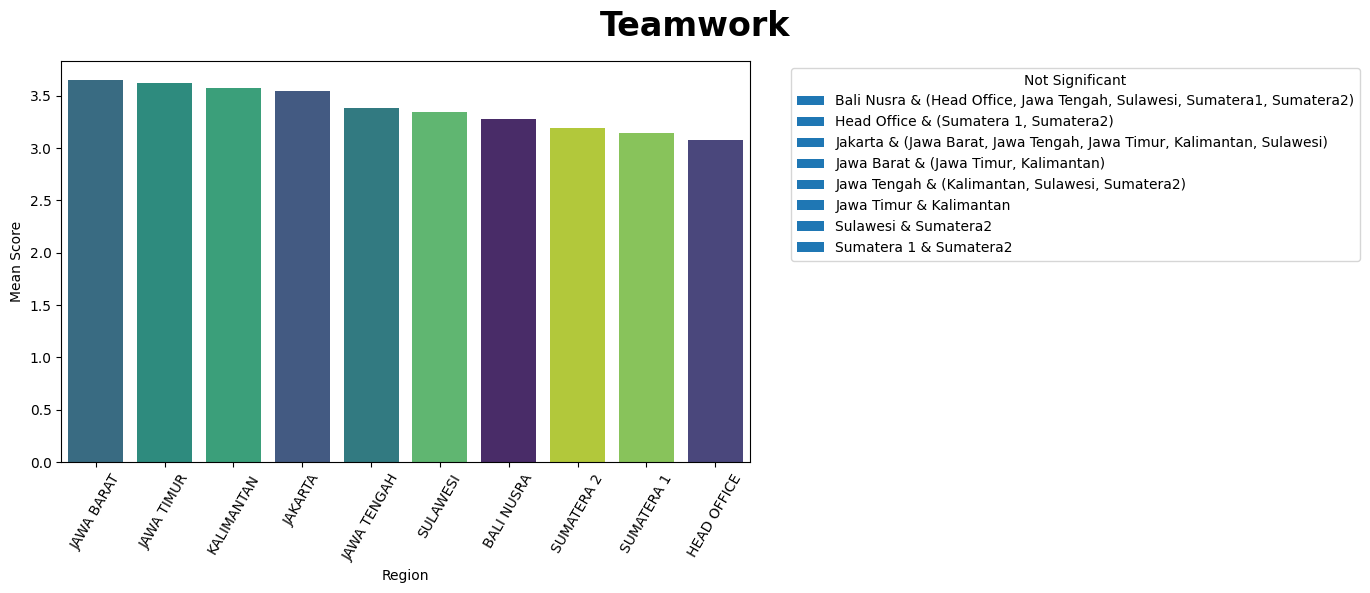

In [103]:
teamwork = mean_by_region_plot[mean_by_region_plot['Psychological Aspect'] == 'Teamwork']
order_tw = teamwork.groupby("Region")["Mean Score"].mean().sort_values(ascending=False).index

# create legend
patch1 = mpatches.Patch(label='Bali Nusra & (Head Office, Jawa Tengah, Sulawesi, Sumatera1, Sumatera2)')
patch2 = mpatches.Patch(label='Head Office & (Sumatera 1, Sumatera2)')
patch3 = mpatches.Patch(label='Jakarta & (Jawa Barat, Jawa Tengah, Jawa Timur, Kalimantan, Sulawesi)')
patch4 = mpatches.Patch(label='Jawa Barat & (Jawa Timur, Kalimantan)')
patch5 = mpatches.Patch(label='Jawa Tengah & (Kalimantan, Sulawesi, Sumatera2)')
patch6 = mpatches.Patch(label='Jawa Timur & Kalimantan')
patch7 = mpatches.Patch(label='Sulawesi & Sumatera2')
patch8 = mpatches.Patch(label='Sumatera 1 & Sumatera2')

# Create a bar plot
plt.figure(figsize=(14, 6))
plt.suptitle('Teamwork', fontsize=24, fontweight='bold', x=0.5,ha='center')
sns.barplot(data=teamwork, x='Region', y='Mean Score', palette='viridis', hue='Region', order=order_tw)
#plt.title('Mean Scores of Teamwork by Region')
plt.xticks(rotation=60)
plt.xlabel('Region')
plt.ylabel('Mean Score')
plt.legend(
    handles=[patch1, patch2, patch3, patch4, patch5, patch6, patch7, patch8],
    title='Not Significant',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)
plt.tight_layout()
plt.show()

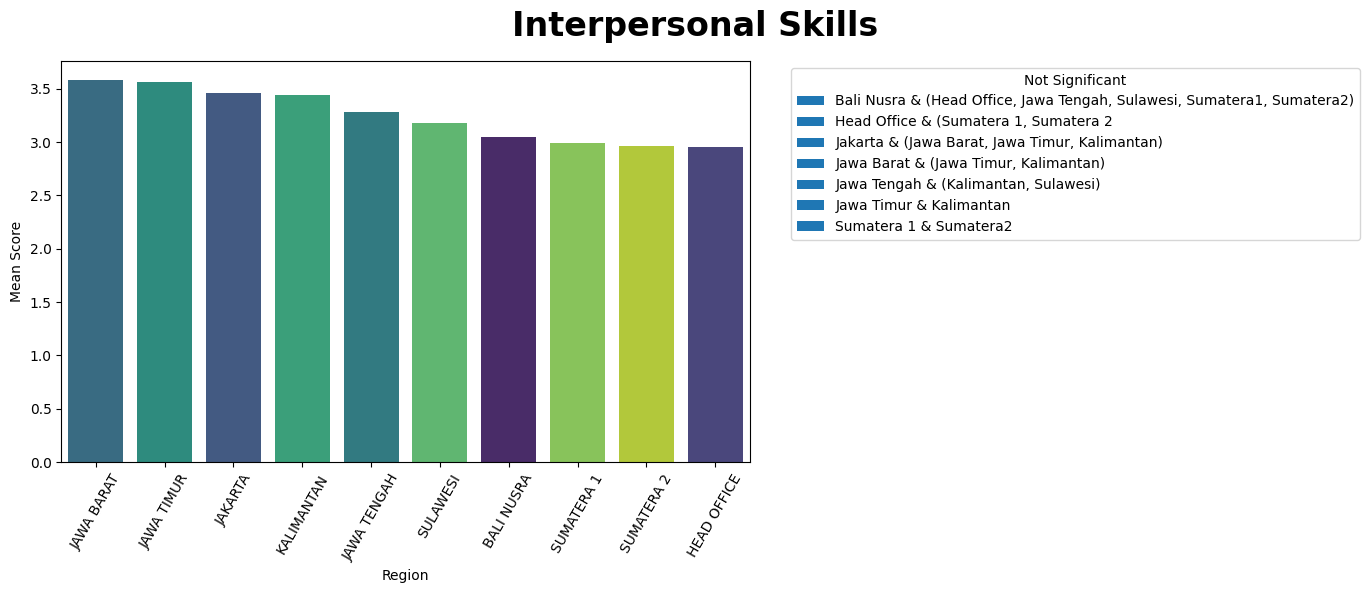

In [104]:
interpersonal_skills = mean_by_region_plot[mean_by_region_plot['Psychological Aspect'] == 'Interpersonal Skills']
order_is = interpersonal_skills.groupby("Region")["Mean Score"].mean().sort_values(ascending=False).index

# create legend
patch1 = mpatches.Patch(label='Bali Nusra & (Head Office, Jawa Tengah, Sulawesi, Sumatera1, Sumatera2)')
patch2 = mpatches.Patch(label='Head Office & (Sumatera 1, Sumatera 2')
patch3 = mpatches.Patch(label='Jakarta & (Jawa Barat, Jawa Timur, Kalimantan)')
patch4 = mpatches.Patch(label='Jawa Barat & (Jawa Timur, Kalimantan)')
patch5 = mpatches.Patch(label='Jawa Tengah & (Kalimantan, Sulawesi)')
patch6 = mpatches.Patch(label='Jawa Timur & Kalimantan')
patch7 = mpatches.Patch(label='Sumatera 1 & Sumatera2')

# Create a bar plot
plt.figure(figsize=(14, 6))
plt.suptitle('Interpersonal Skills', fontsize=24, fontweight='bold', x=0.5,ha='center')
sns.barplot(data=interpersonal_skills, x='Region', y='Mean Score', palette='viridis', hue='Region', order=order_is)
#plt.title('Mean Scores of Interpersonal Skills by Region')
plt.xticks(rotation=60)
plt.xlabel('Region')
plt.ylabel('Mean Score')
plt.legend(
    handles=[patch1, patch2, patch3, patch4, patch5, patch6, patch7],
    title='Not Significant',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)
plt.tight_layout()
plt.show()